In [1]:
import geopandas as gpd
import pandas as pd
import folium
from shapely.geometry import Point, Polygon, LineString, MultiPoint
import matplotlib.pyplot as plt

In [66]:
PATH_drivers = '/Users/viconstel/JupyterProjects/city-mobil/data'
PATH_drivers_with_problems = '//Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems'
fraud_ac = pd.read_csv(PATH_drivers_with_problems+'/2025312357143911724/accelerometer.csv').sort_values('time')
fraud_track = pd.read_csv(PATH_drivers_with_problems+'/2025312357143911724/track.csv').sort_values('time')

In [67]:
fraud_ac.head()

,time,x,y,z,lat,lon
58,2021-04-12 11:18:26.068266+03:00,0.931344,9.692925,2.159570,55.756474,37.695483
4250,2021-04-12 11:18:26.070640+03:00,0.933739,9.665392,2.076970,55.756474,37.695483
59,2021-04-12 11:18:26.072441+03:00,0.946907,9.671378,2.108095,55.756454,37.695475
4254,2021-04-12 11:18:26.073274+03:00,0.938527,9.676167,2.099715,55.756454,37.695470
60,2021-04-12 11:18:26.074903+03:00,0.942118,9.677363,2.090138,55.756454,37.695470


In [68]:
fraud_track.head()

,time,lat,lon,gps_time
0,2021-04-13 11:11:07,55.765980,37.707788,2021-04-13 11:11:07
1,2021-04-13 11:11:08,55.765980,37.707788,2021-04-13 11:11:07
2,2021-04-13 11:11:08,55.754542,37.697707,2021-04-13 11:11:07
3,2021-04-13 11:11:08,55.754542,37.697707,2021-04-13 11:11:08
5,2021-04-13 11:11:09,55.754542,37.697707,2021-04-13 11:11:09


In [69]:
map_fraud = folium.Map(location=[55.7504461, 37.6174943])

points_ac = fraud_ac[fraud_ac.time.str.startswith('2021-04-13')][['lat', 'lon']].values
folium.PolyLine(points_ac, color='red').add_to(map_fraud)
folium.Marker(points_ac[0], 
              icon=folium.Icon(icon='flag', prefix='fa', color='red')).add_to(map_fraud)
folium.Marker(points_ac[-1], 
              icon=folium.Icon(icon='flag-checkered', prefix='fa', color='red')).add_to(map_fraud)

points_track = fraud_track[fraud_track.time.str.startswith('2021-04-13')][['lat', 'lon']].values
folium.PolyLine(points_track, color='green').add_to(map_fraud)
folium.Marker(points_track[0], 
              icon=folium.Icon(icon='flag', prefix='fa', color='green')).add_to(map_fraud)
folium.Marker(points_track[-1], 
              icon=folium.Icon(icon='flag-checkered', prefix='fa', color='green')).add_to(map_fraud)

In [70]:
map_fraud

In [71]:
not_fraud_ac = pd.read_csv(PATH_drivers+'/3421995393814356075/accelerometer.csv').sort_values('time')
not_fraud_track = pd.read_csv(PATH_drivers+'/3421995393814356075/track.csv').sort_values('time')

In [72]:
not_fraud_ac.head()

,time,x,y,z,lat,lon
475,2021-04-03 13:51:08.648201+03:00,0.29895,9.327001,3.37095,55.692267,37.573147
6,2021-04-03 13:51:08.648802+03:00,0.29400,9.025950,3.68895,55.692267,37.573147
471,2021-04-03 13:51:08.649412+03:00,0.18900,9.538051,3.59595,55.692267,37.573147
7,2021-04-03 13:51:08.649994+03:00,-0.09000,8.688001,4.59195,55.692267,37.573147
137,2021-04-03 13:51:08.650578+03:00,1.03095,9.463950,3.45195,55.692267,37.573147


In [73]:
not_fraud_track.head()

,time,lat,lon,gps_time
0,2021-04-03 06:16:36,55.677162,37.546521,2021-04-03 03:36:43
1,2021-04-03 06:16:36,55.677168,37.546521,2021-04-03 06:16:35
2,2021-04-03 06:35:38,55.677171,37.546524,2021-04-03 06:35:34
3,2021-04-03 07:06:57,55.677176,37.546550,2021-04-03 07:06:53
4,2021-04-03 07:24:53,55.677176,37.546550,2021-04-03 07:06:53


In [74]:
map_not_fraud = folium.Map(location=[55.7504461, 37.6174943])

points_ac = not_fraud_ac[not_fraud_ac.time.str.startswith('2021-04-03')][['lat', 'lon']].values
folium.PolyLine(points_ac, color='red').add_to(map_not_fraud)
folium.Marker(points_ac[0], 
              icon=folium.Icon(icon='flag', prefix='fa',  color='red')).add_to(map_not_fraud)
folium.Marker(points_ac[-1], 
              icon=folium.Icon(icon='flag-checkered', prefix='fa', color='red')).add_to(map_not_fraud)

points_track = not_fraud_track[not_fraud_track.time.str.startswith('2021-04-03')][['lat', 'lon']].values
folium.PolyLine(points_track, color='green').add_to(map_not_fraud)
folium.Marker(points_track[0], 
              icon=folium.Icon(icon='flag', prefix='fa', color='green')).add_to(map_not_fraud)
folium.Marker(points_track[-1], 
              icon=folium.Icon(icon='flag-checkered', prefix='fa', color='green')).add_to(map_not_fraud)

In [75]:
map_not_fraud

In [85]:
not_fraud_ac.describe()

,x,y,z,lat,lon
count,587.000000,587.000000,587.000000,587.000000,587.000000
mean,0.096586,8.936942,3.995635,55.676591,37.555639
std,0.882551,0.688339,1.045057,0.010623,0.017325
min,-3.832950,4.611000,0.766050,55.660469,37.538983
25%,-0.202950,8.653500,3.352950,55.667668,37.542022
50%,0.145950,8.932051,4.024050,55.673433,37.548892
75%,0.467550,9.294001,4.505475,55.684397,37.564122
max,3.760950,11.404950,8.815050,55.693949,37.589025


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cc9545490>,
      dtype=object)

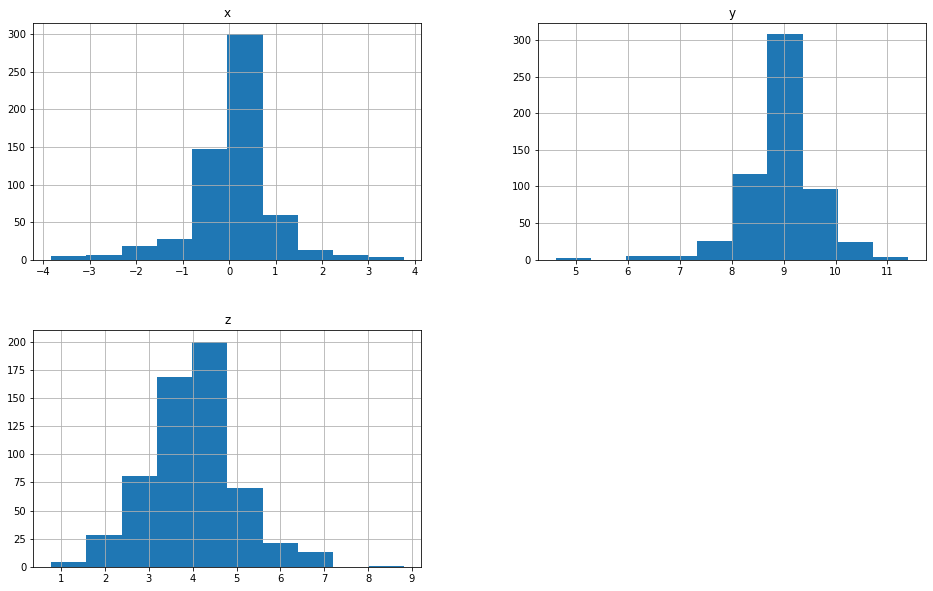

In [80]:
not_fraud_ac[['x', 'y', 'z']].hist(figsize=(16, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cae886100>,
      dtype=object)

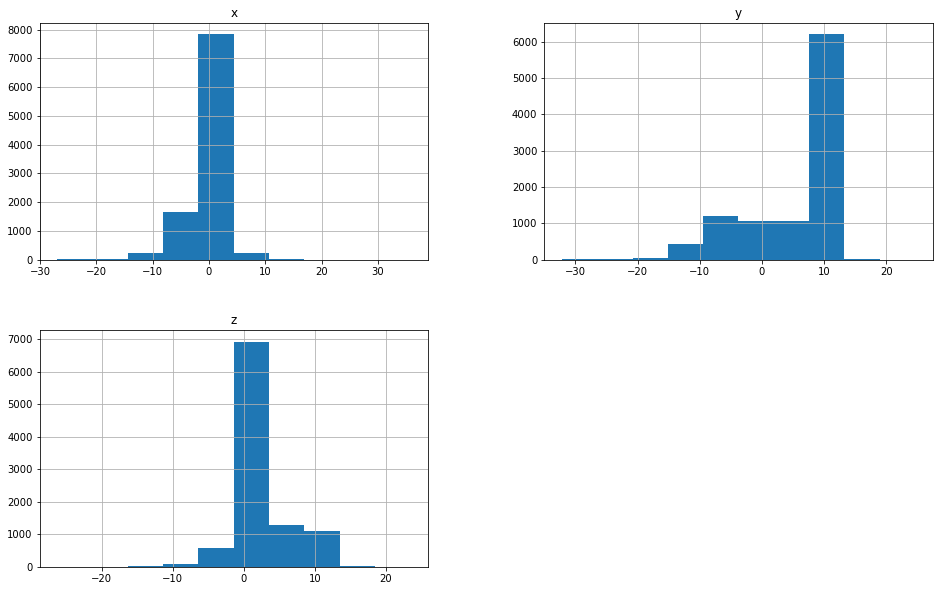

In [121]:
fraud_ac[['x', 'y', 'z']].hist(figsize=(16, 10))

In [118]:
velocities = [0]

for i in range(1, len(not_fraud_ac)):
    delta_t = pd.to_datetime(not_fraud_ac['time'].iat[i]) - pd.to_datetime(not_fraud_ac['time'].iat[i-1])
    cur_velocity = velocities[i-1] + not_fraud_ac['x'].iat[i] * delta_t.total_seconds()
    velocities.append(cur_velocity)

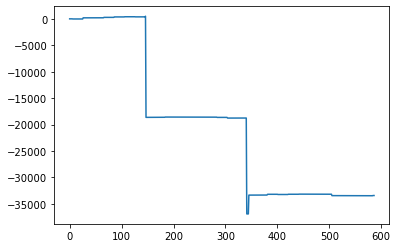

In [120]:
plt.plot(velocities)

In [101]:
t.total_seconds()

0.000461

In [115]:
not_fraud_ac['x'].iat[2]

0.18900001

In [26]:
import os
import matplotlib.pyplot as plt

In [3]:
GOOD_DIR = '/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates'
BAD_DIR = '/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems'

In [17]:
stats = []

for dir_name in os.listdir(GOOD_DIR):
    if dir_name == '.DS_Store':
        continue
    
    path = os.path.join(GOOD_DIR, dir_name)
    print(os.path.join(path, 'accelerometer.csv'))
    df = pd.read_csv(os.path.join(path, 'accelerometer.csv'))[['x', 'y', 'z']]
    stats.append([dir_name] + list(df.mean().values) + list(df.std().values))

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/4633179079544742811/accelerometer.csv
/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/-8285444573847573076/accelerometer.csv
/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/-8855449059095575743/accelerometer.csv
/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/7934040023444826650/accelerometer.csv
/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/-3754613297758316782/accelerometer.csv
/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/2339565149906962126/accelerometer.csv
/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/50909632375203636/accelerometer.csv
/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/4957397998143787649/accelerometer.csv
/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/-4080393840523659459/accelerometer.csv
/Users/viconstel/JupyterProjects/city-mobil/data_good_right_da

In [19]:
good_df = pd.DataFrame({
    'driver': [i[0] for i in stats],
    'x_mean': [i[1] for i in stats],
    'y_mean': [i[2] for i in stats],
    'z_mean': [i[3] for i in stats],
    'x_std': [i[4] for i in stats],
    'y_std': [i[5] for i in stats],
    'z_std': [i[6] for i in stats],
})

In [22]:
stats = []

for dir_name in os.listdir(BAD_DIR):
    if dir_name == '.DS_Store':
        continue
    
    path = os.path.join(BAD_DIR, dir_name)
    print(os.path.join(path, 'accelerometer.csv'))
    df = pd.read_csv(os.path.join(path, 'accelerometer.csv'))[['x', 'y', 'z']]
    stats.append([dir_name] + list(df.mean().values) + list(df.std().values))

/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/-3962756297262839169/accelerometer.csv
/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/2765355583032989810/accelerometer.csv
/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/-7078426713190014901/accelerometer.csv
/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/-2988946964244641879/accelerometer.csv
/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/-2132251359044308970/accelerometer.csv
/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/8569741546477592565/accelerometer.csv
/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/1293535473153840726/accelerometer.csv
/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/-8729475955540025841/accelerometer.csv
/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problem

In [23]:
bad_df = pd.DataFrame({
    'driver': [i[0] for i in stats],
    'x_mean': [i[1] for i in stats],
    'y_mean': [i[2] for i in stats],
    'z_mean': [i[3] for i in stats],
    'x_std': [i[4] for i in stats],
    'y_std': [i[5] for i in stats],
    'z_std': [i[6] for i in stats],
})

In [24]:
good_df

,driver,x_mean,y_mean,z_mean,x_std,y_std,z_std
0,4633179079544742811,-0.145994,8.951794,4.023573,0.611477,0.567070,0.905623
1,-8285444573847573076,0.146633,8.895104,3.319787,1.458479,1.461324,1.935171
2,-8855449059095575743,0.112081,8.794172,3.625056,2.198799,2.612436,1.633381
3,7934040023444826650,0.356508,8.576047,4.291692,0.948899,0.804434,1.574853
4,-3754613297758316782,1.366678,8.455595,4.319623,1.134601,1.078017,1.592269
5,2339565149906962126,0.156825,8.987079,2.459607,1.333158,2.348940,2.255132
6,50909632375203636,0.752552,9.345863,3.107121,0.891469,0.639861,0.892264
7,4957397998143787649,-0.025337,7.188180,6.172918,0.980283,1.881092,1.471540
8,-4080393840523659459,-0.097028,7.252203,3.309509,1.366415,2.050759,2.640611
9,-4294745953159109974,0.140440,8.600157,3.833200,1.445533,1.631035,1.691358


In [25]:
bad_df

,driver,x_mean,y_mean,z_mean,x_std,y_std,z_std
0,-3962756297262839169,-0.402478,0.381804,5.192732,5.507444,7.804385,5.180175
1,2765355583032989810,-0.065637,0.027695,9.902669,0.063866,0.201716,0.127527
2,-7078426713190014901,-0.668821,6.106767,3.515100,4.539000,6.179480,2.859120
3,-2988946964244641879,0.084789,9.417761,2.867497,0.869003,0.806830,1.139544
4,-2132251359044308970,0.272098,3.348612,5.743644,2.870940,6.201079,3.533015
5,8569741546477592565,0.121391,7.061262,3.440043,1.732547,3.705729,4.233440
6,1293535473153840726,1.261395,2.011916,7.106942,5.071388,4.189856,3.657967
7,-8729475955540025841,1.373937,3.061372,6.206733,3.822226,6.071304,3.846629
8,-6715898809375179473,2.472085,2.087636,5.034865,5.022251,5.167045,3.688541
9,-7745607963253656189,0.603762,7.520441,2.402717,1.719433,3.386631,3.989011


/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/4633179079544742811/accelerometer.csv


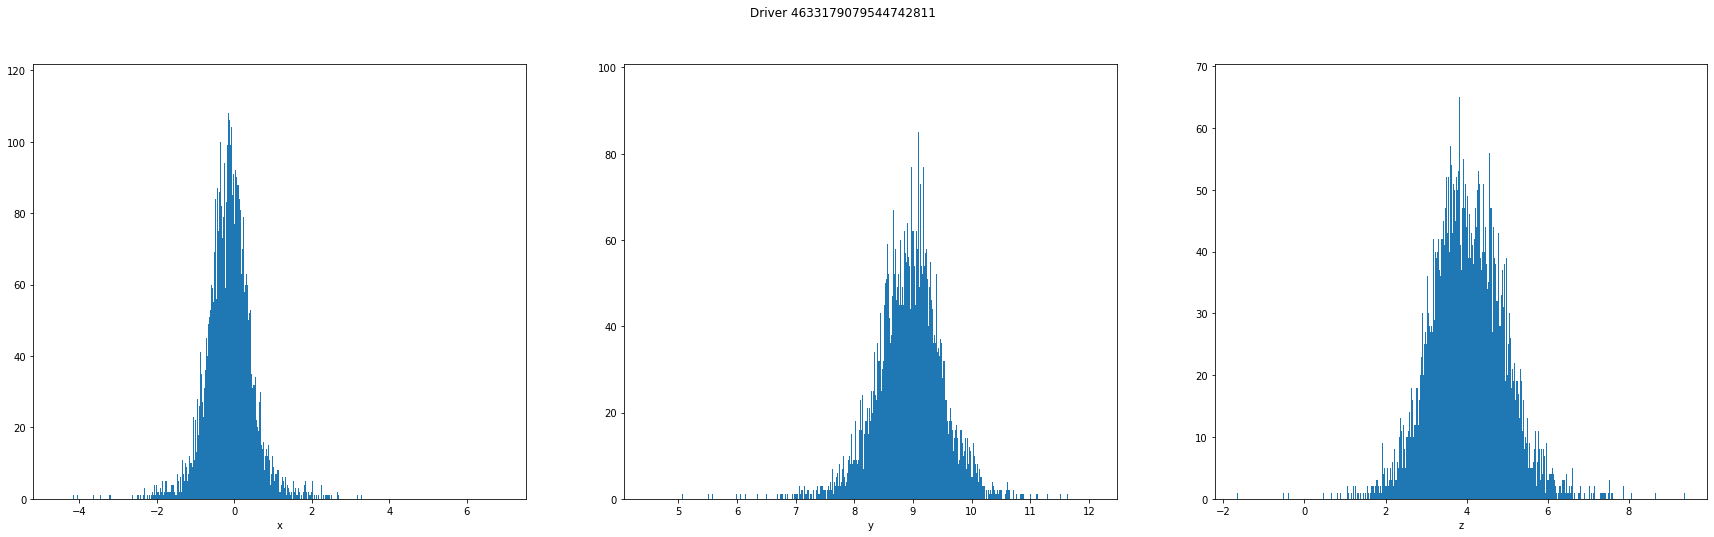

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/-8285444573847573076/accelerometer.csv


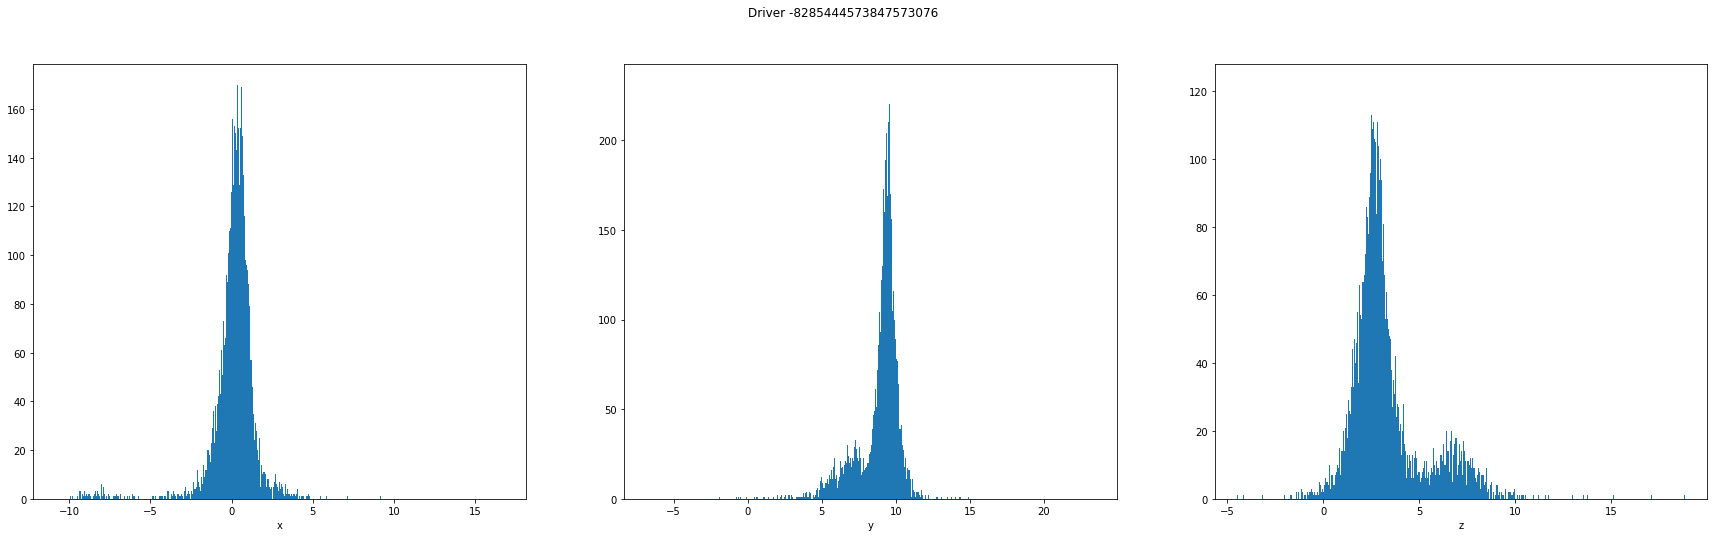

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/-8855449059095575743/accelerometer.csv


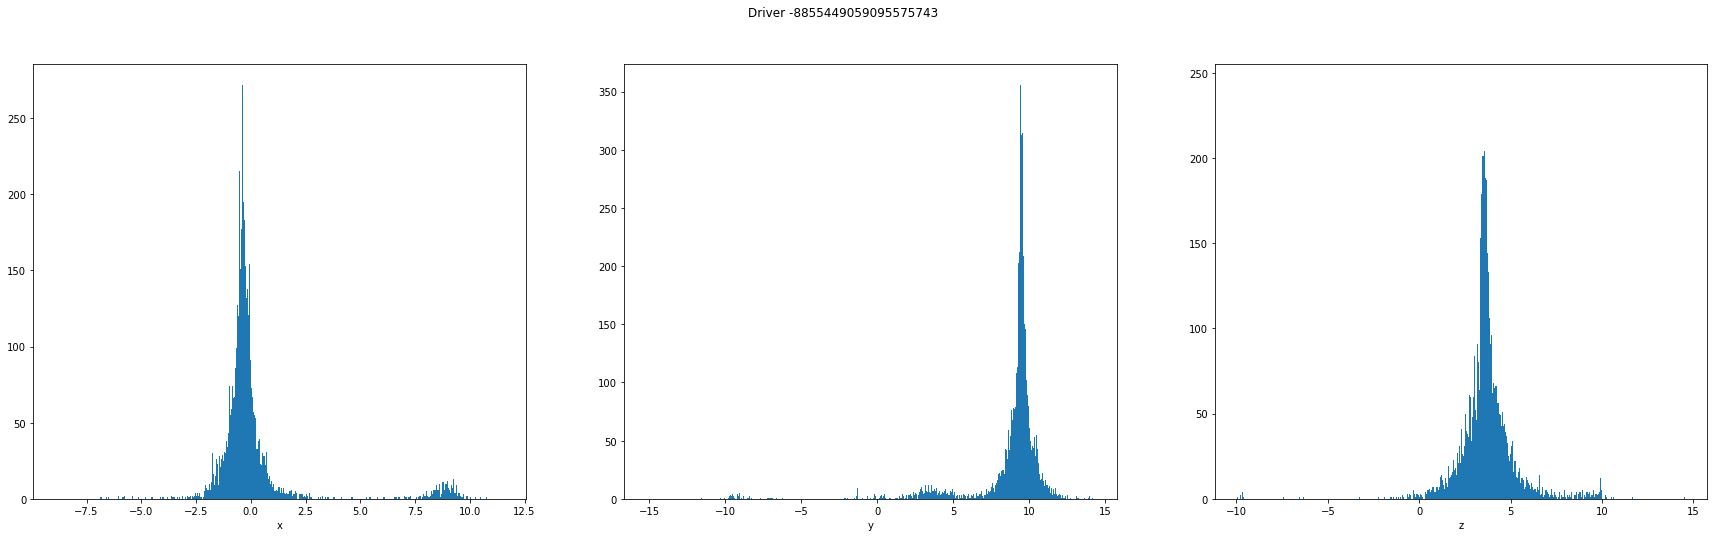

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/7934040023444826650/accelerometer.csv


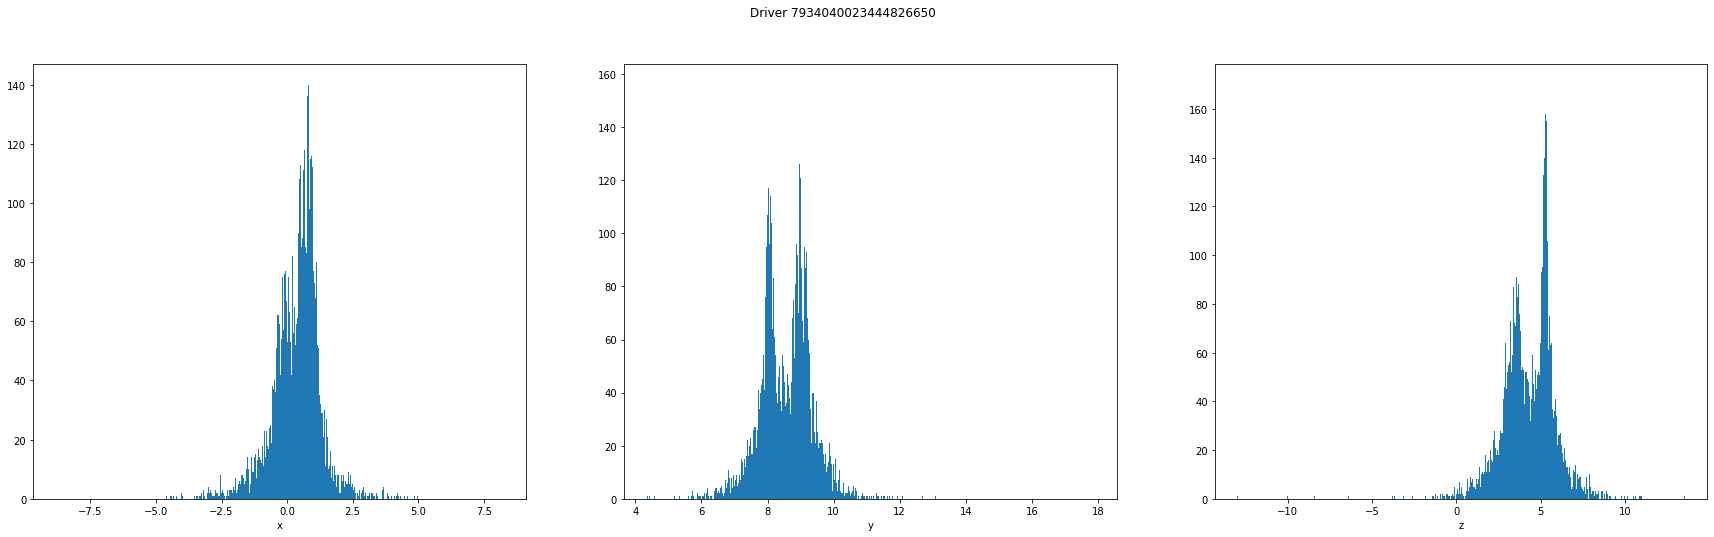

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/-3754613297758316782/accelerometer.csv


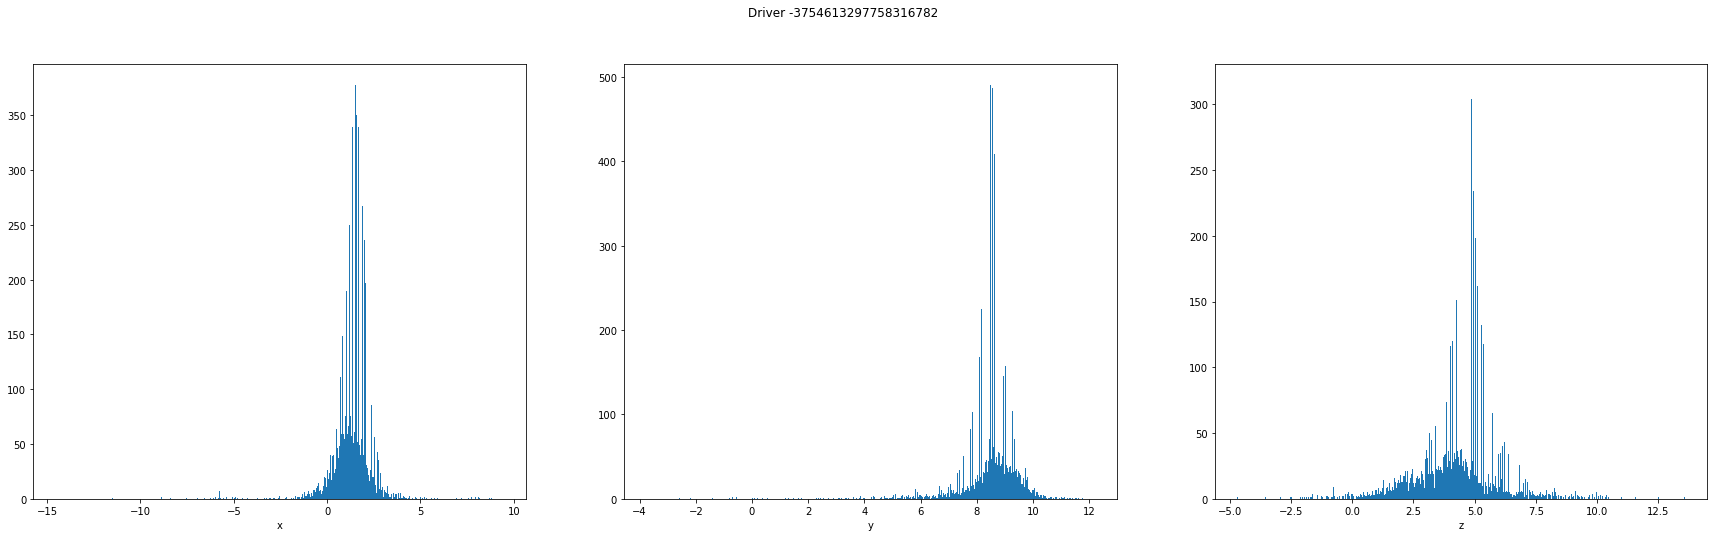

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/2339565149906962126/accelerometer.csv


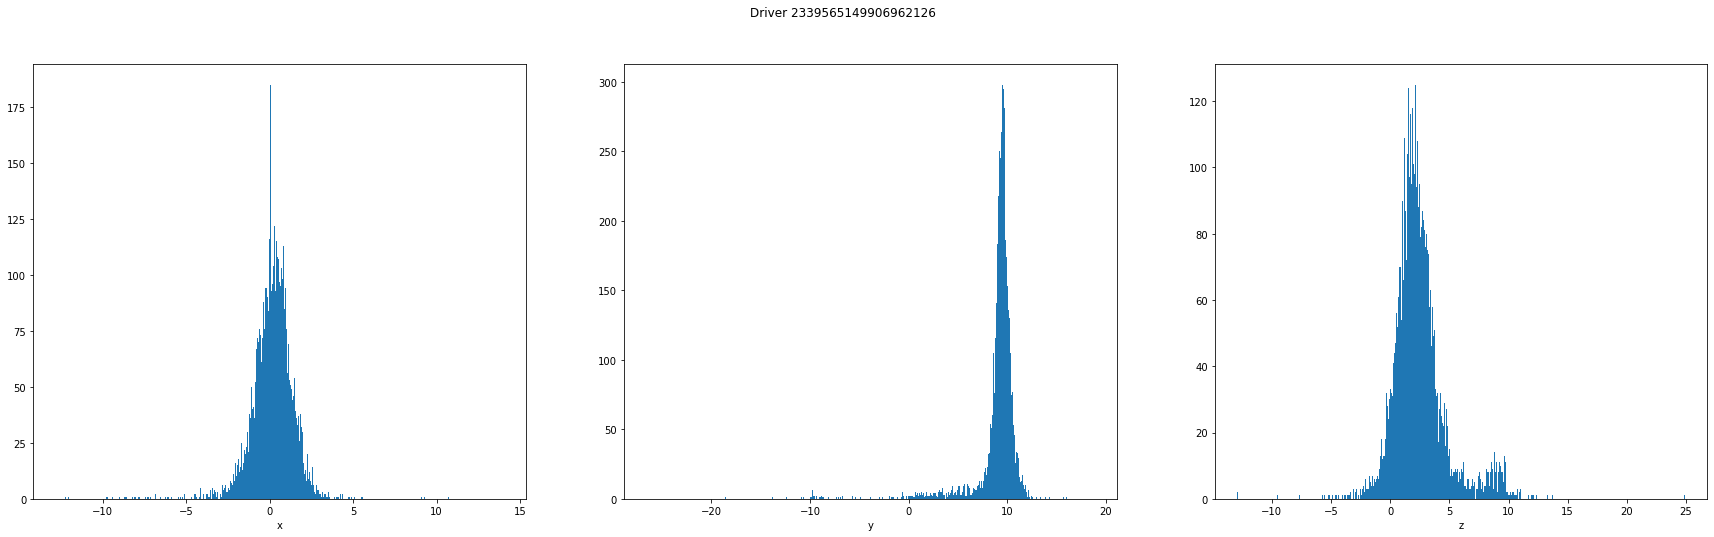

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/50909632375203636/accelerometer.csv


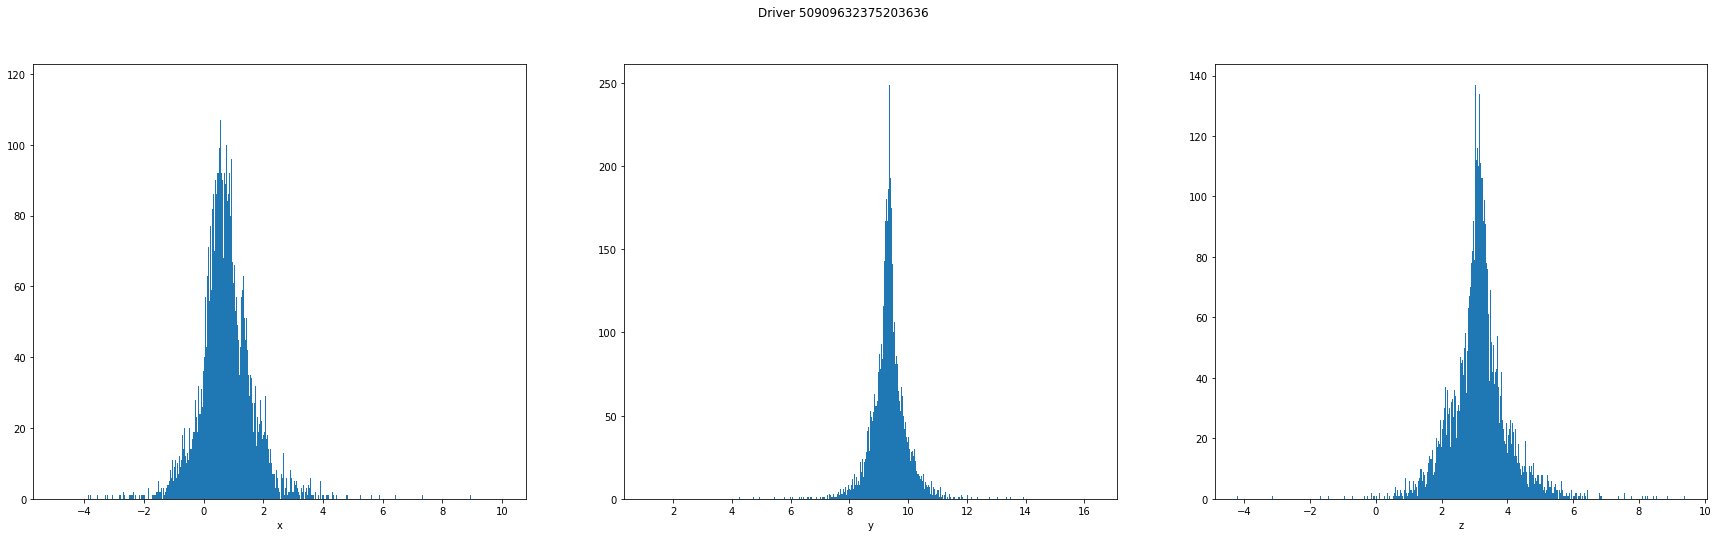

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/4957397998143787649/accelerometer.csv


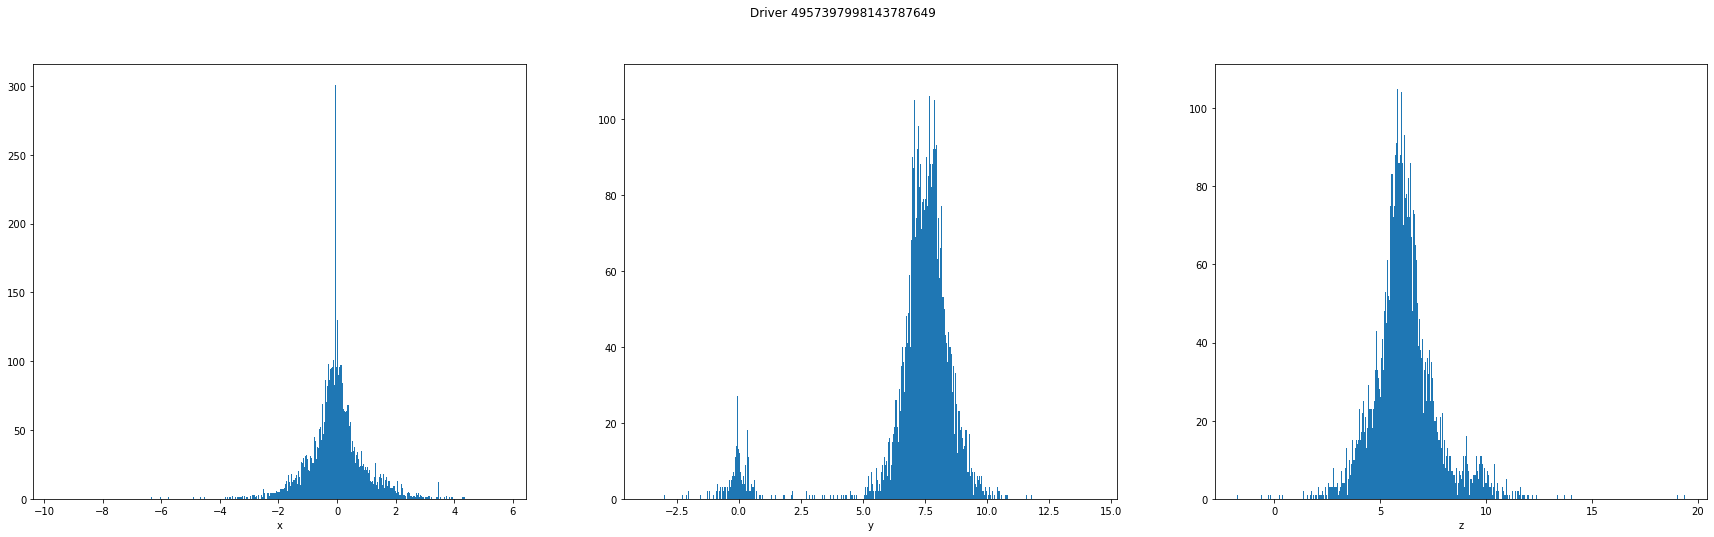

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/-4080393840523659459/accelerometer.csv


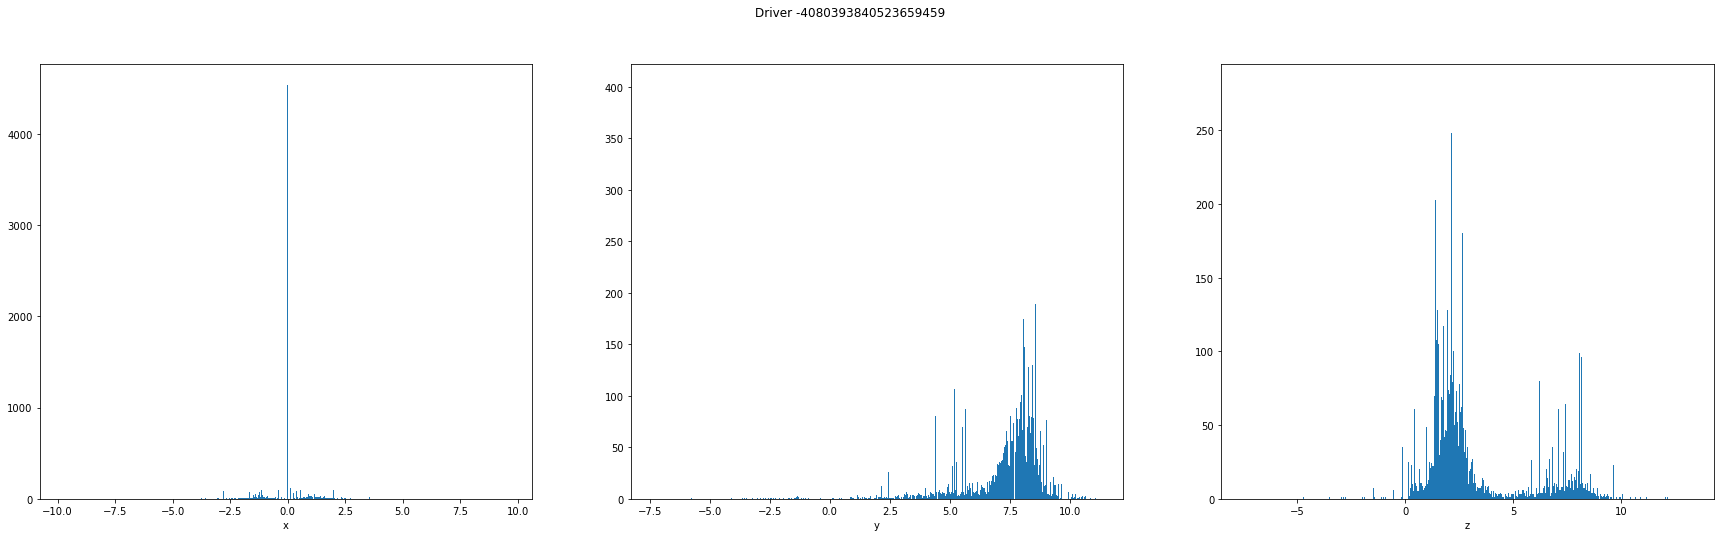

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/-4294745953159109974/accelerometer.csv


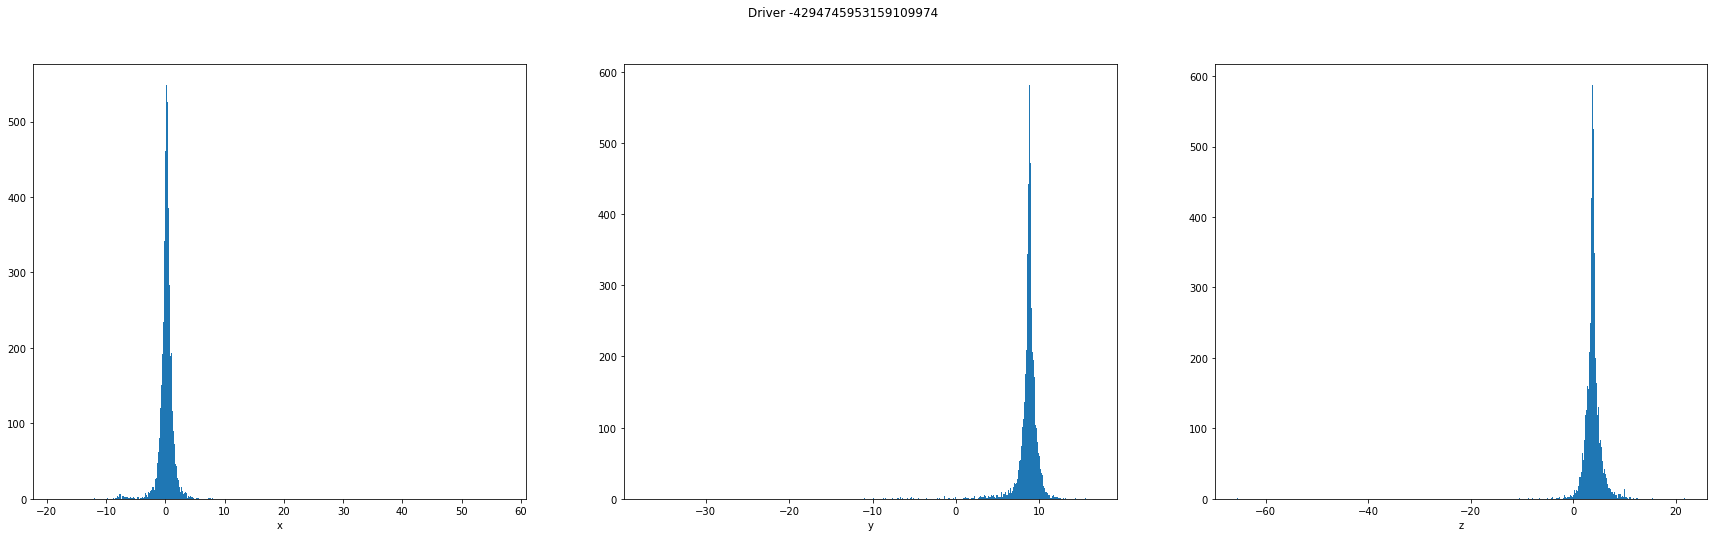

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/-917569374742463282/accelerometer.csv


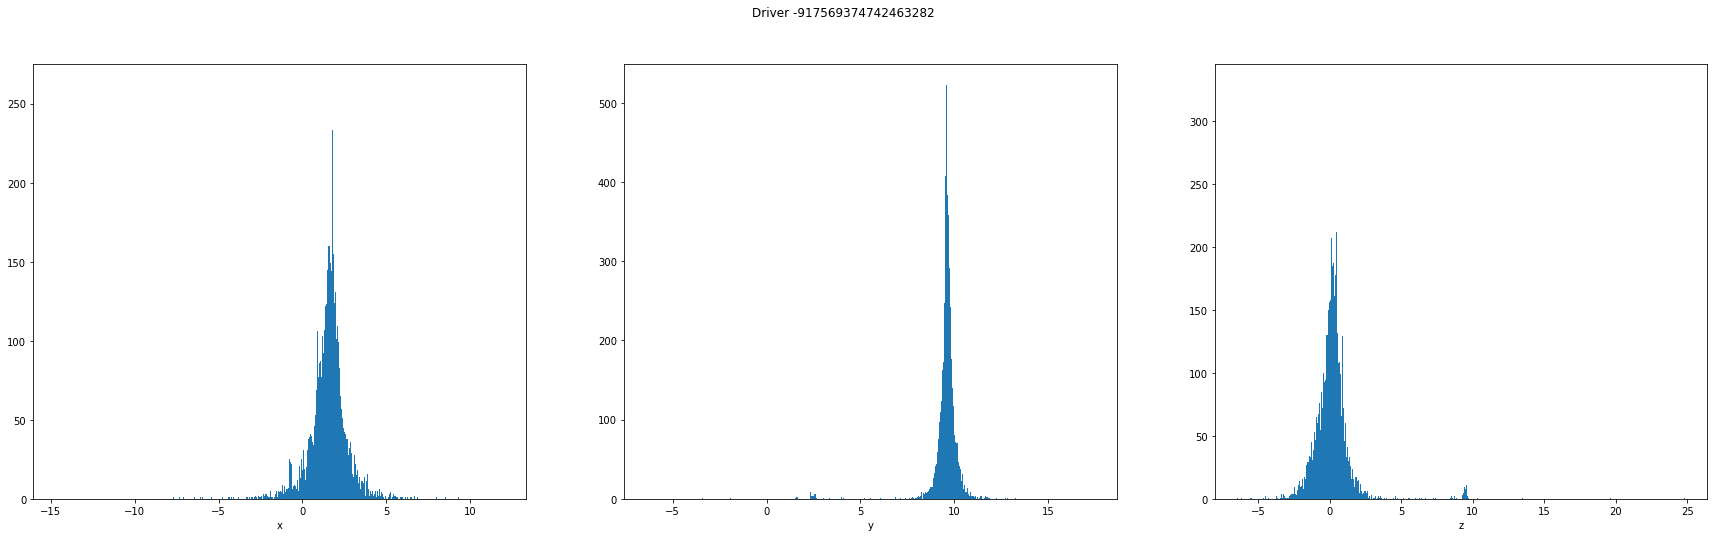

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/631642712709916337/accelerometer.csv


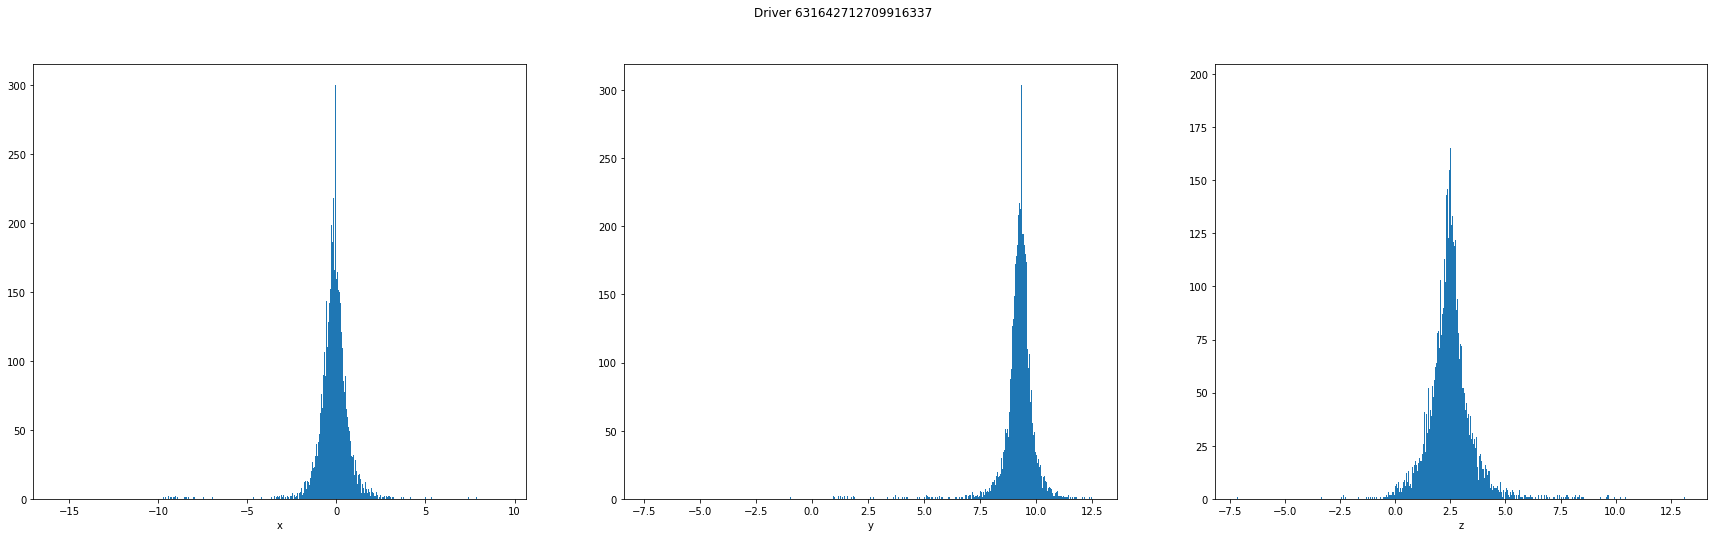

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/-4472006672024242679/accelerometer.csv


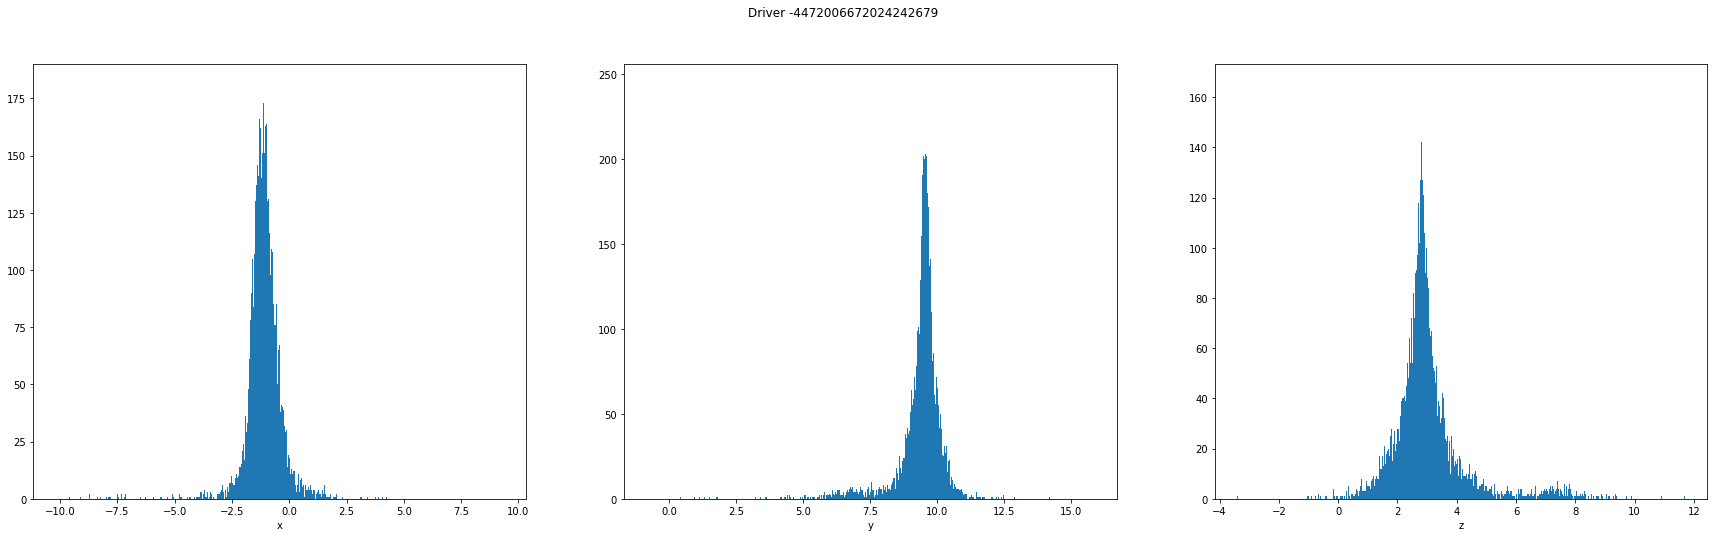

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/254619638422759589/accelerometer.csv


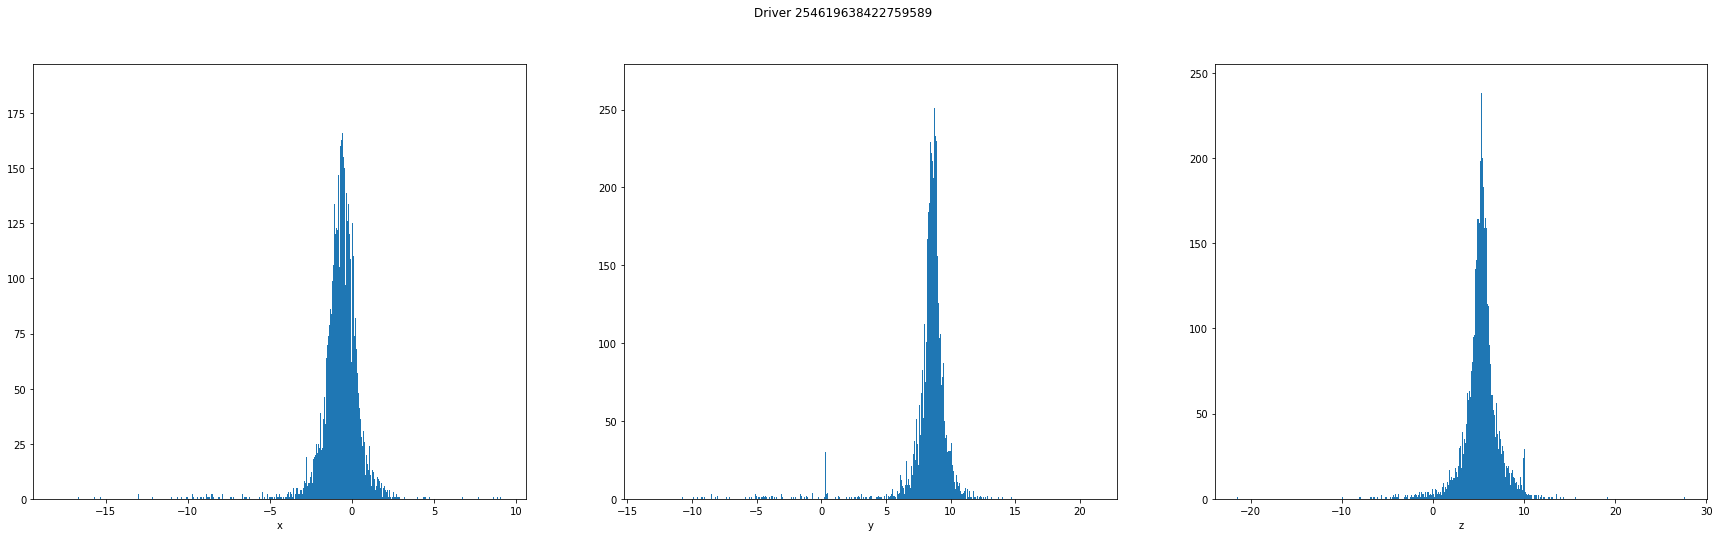

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/5960642249321857991/accelerometer.csv


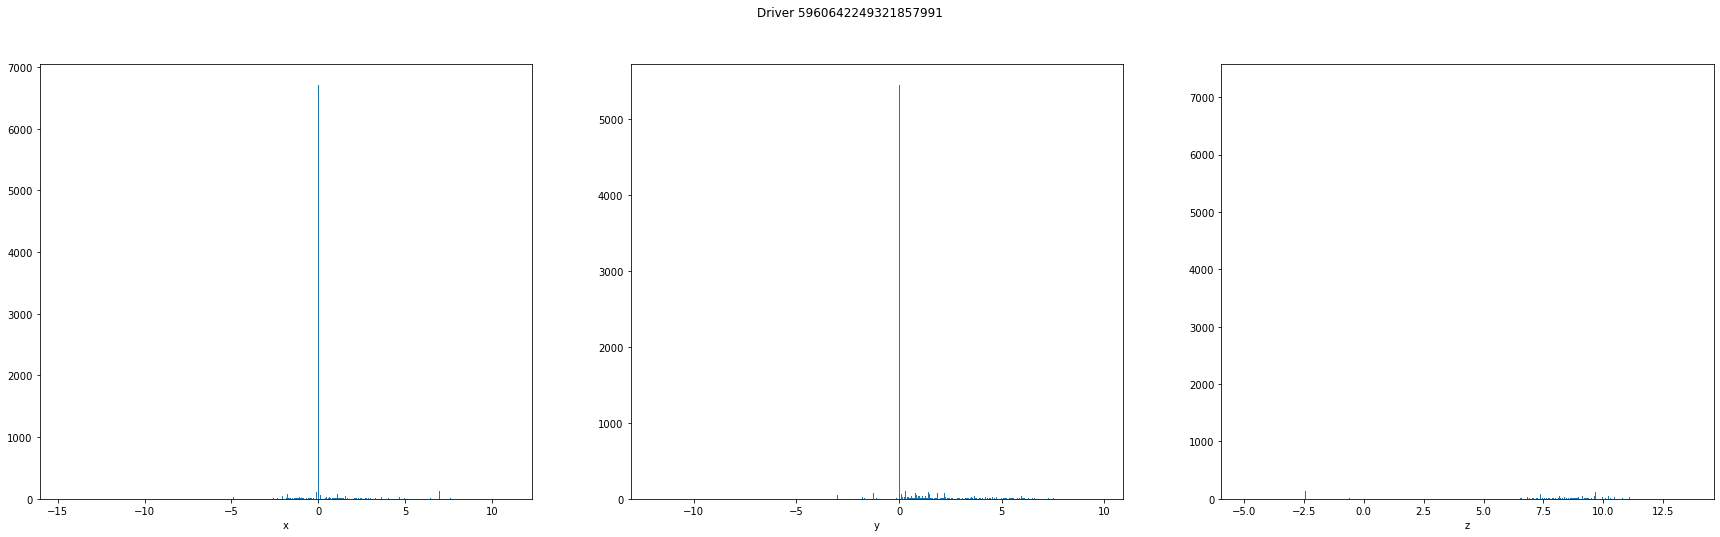

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/-2326108064915089301/accelerometer.csv


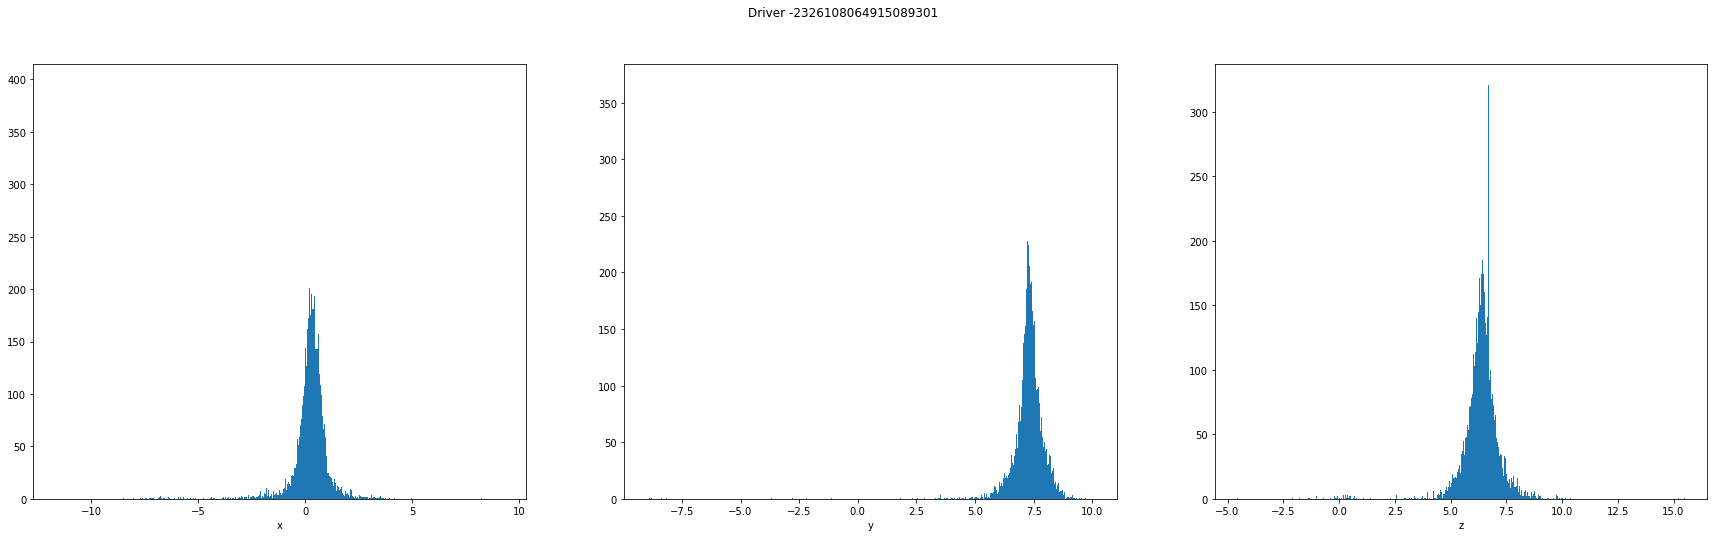

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/269342988796658819/accelerometer.csv


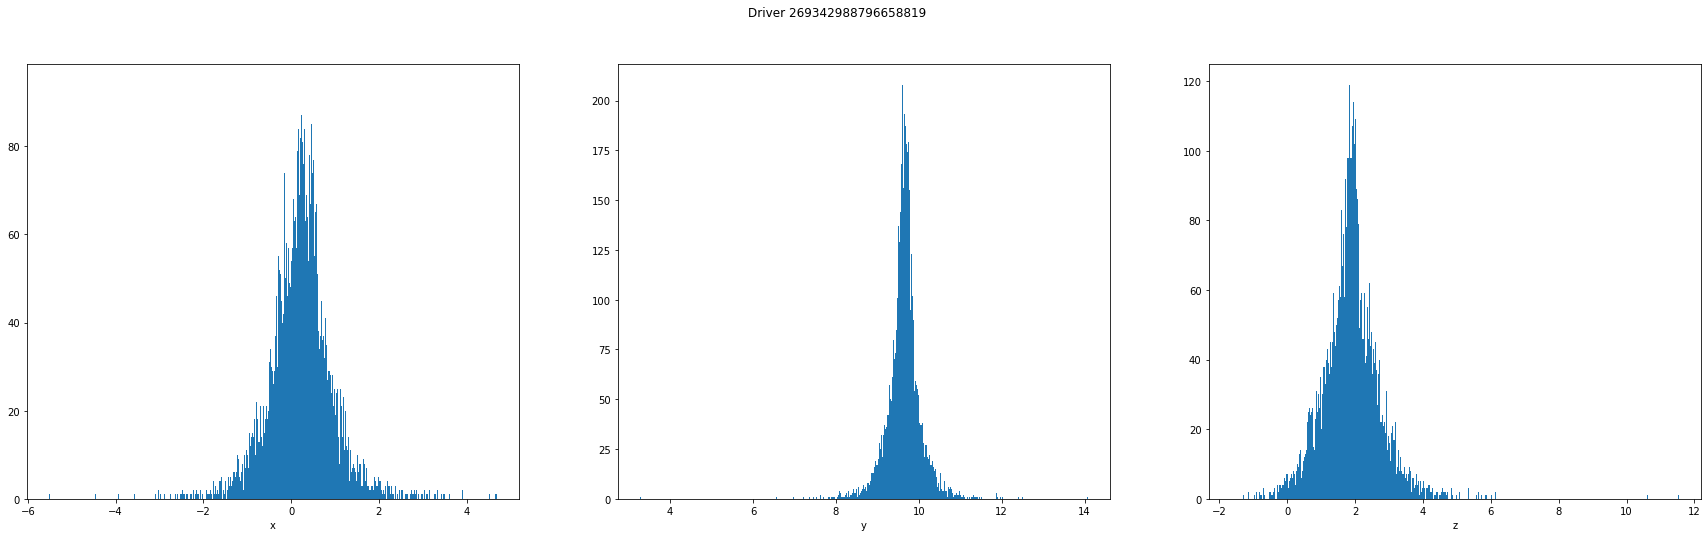

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/102237250308562244/accelerometer.csv


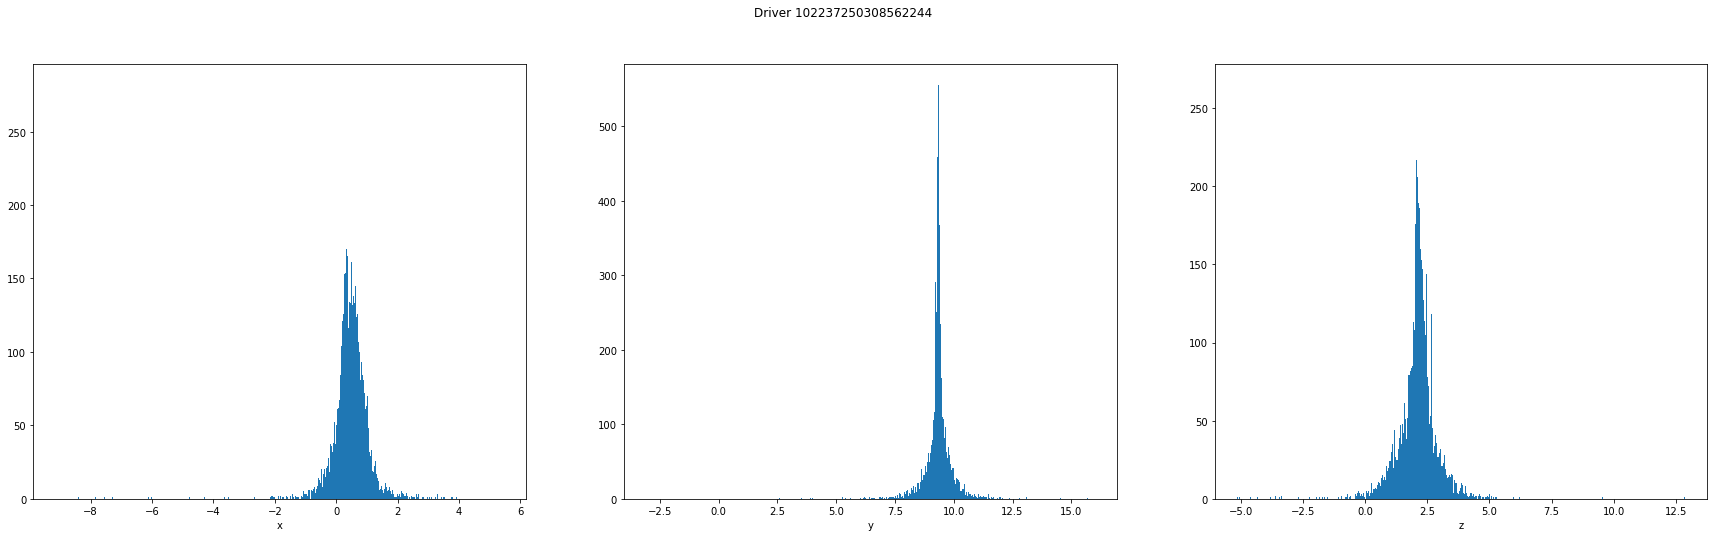

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/7363918686470073741/accelerometer.csv


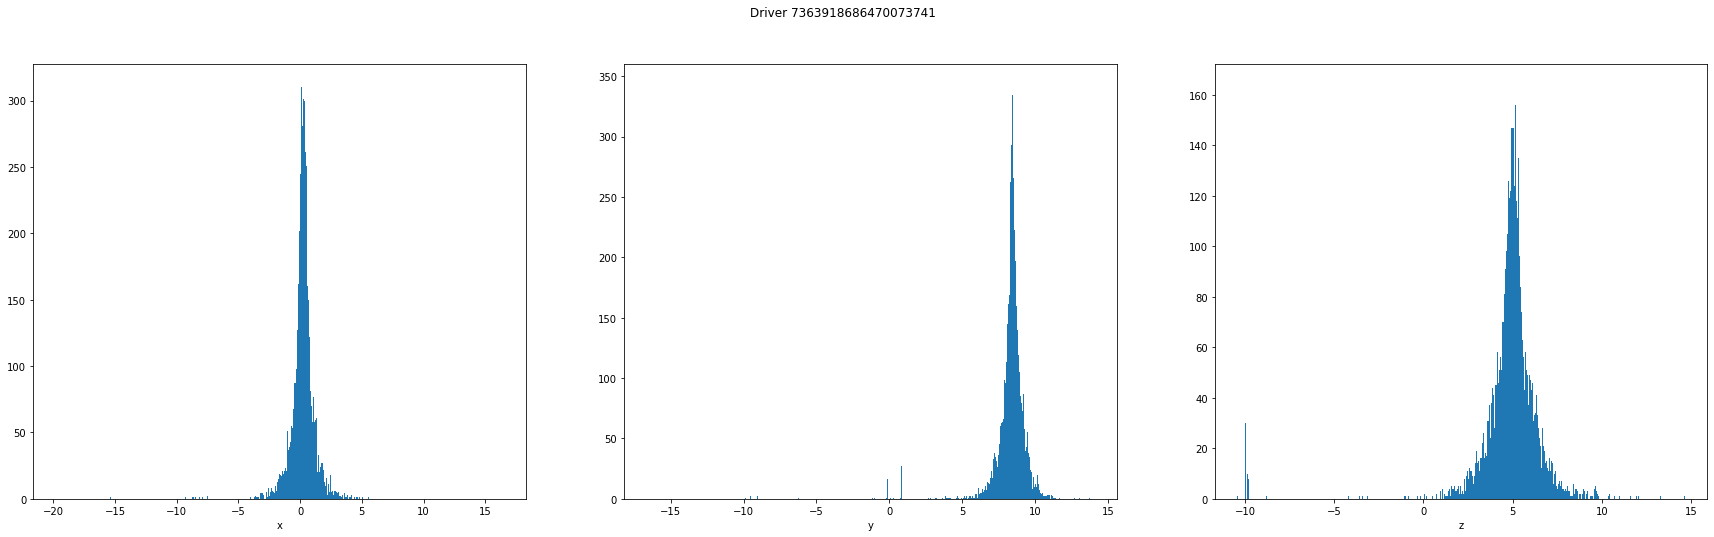

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/5900186570978300677/accelerometer.csv


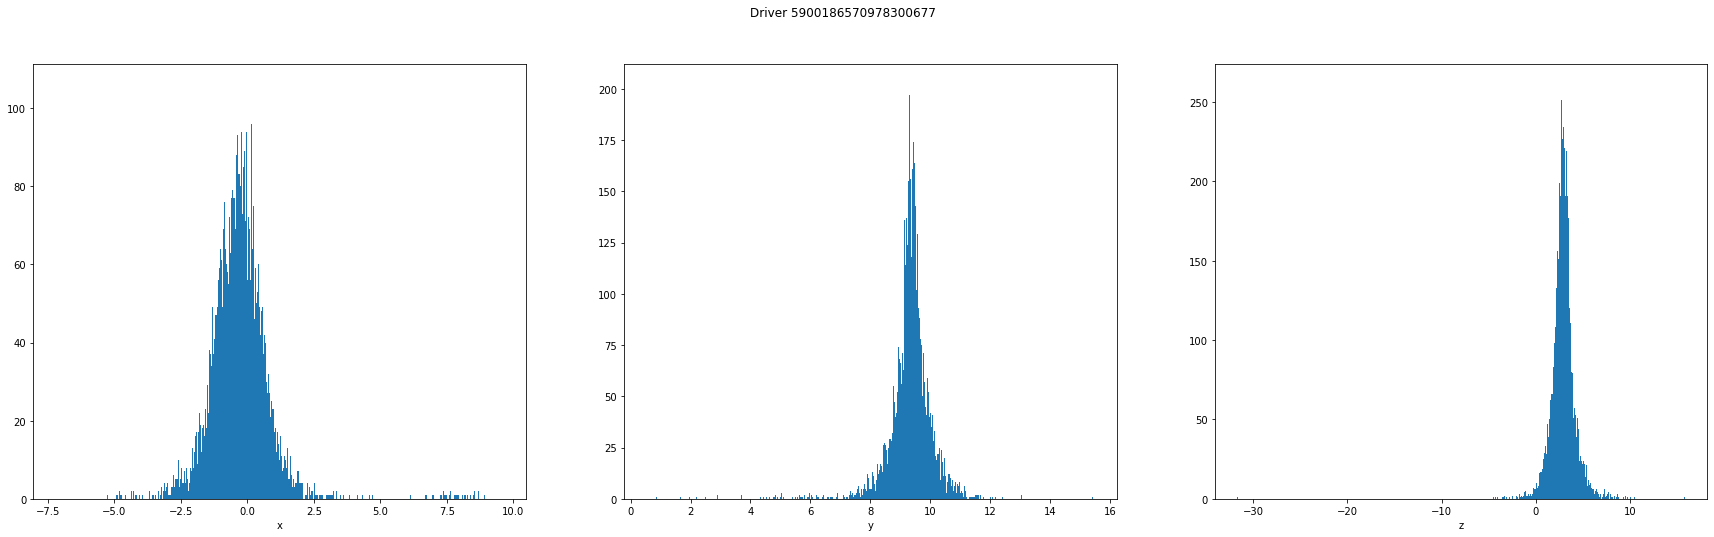

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/8893554023910460211/accelerometer.csv


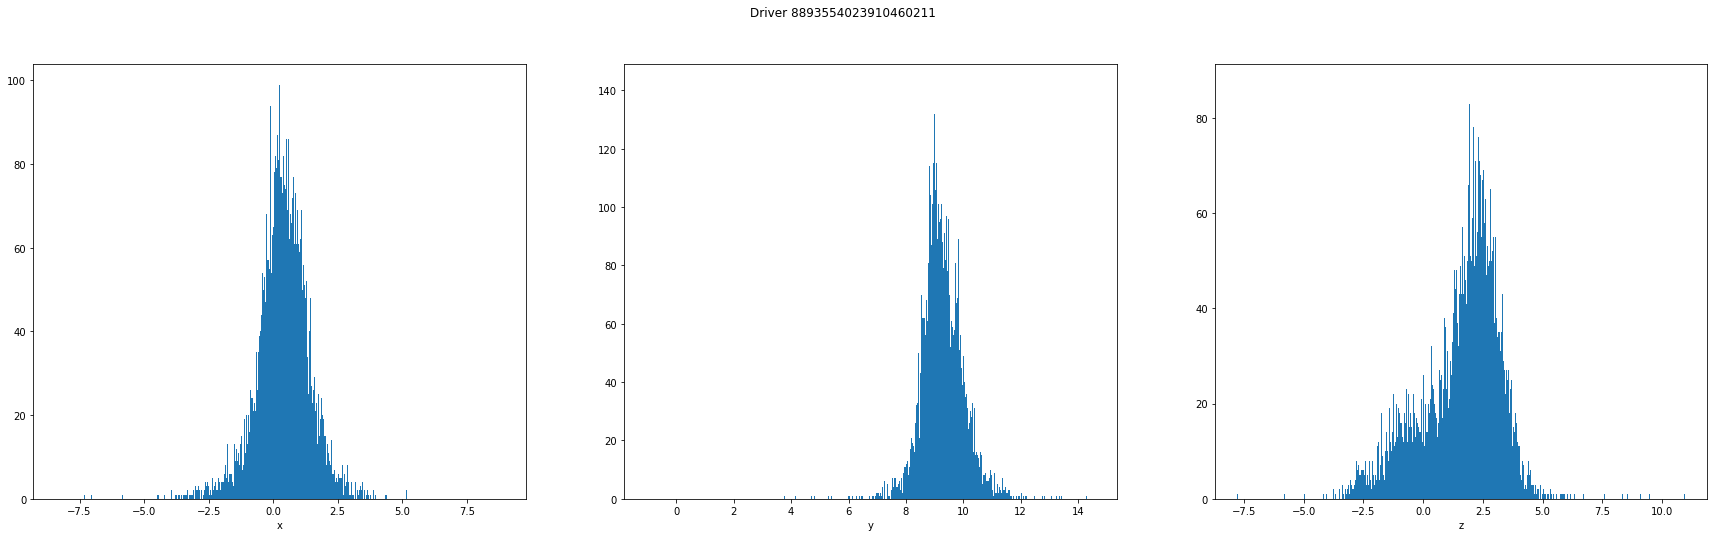

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/4805235792201203747/accelerometer.csv


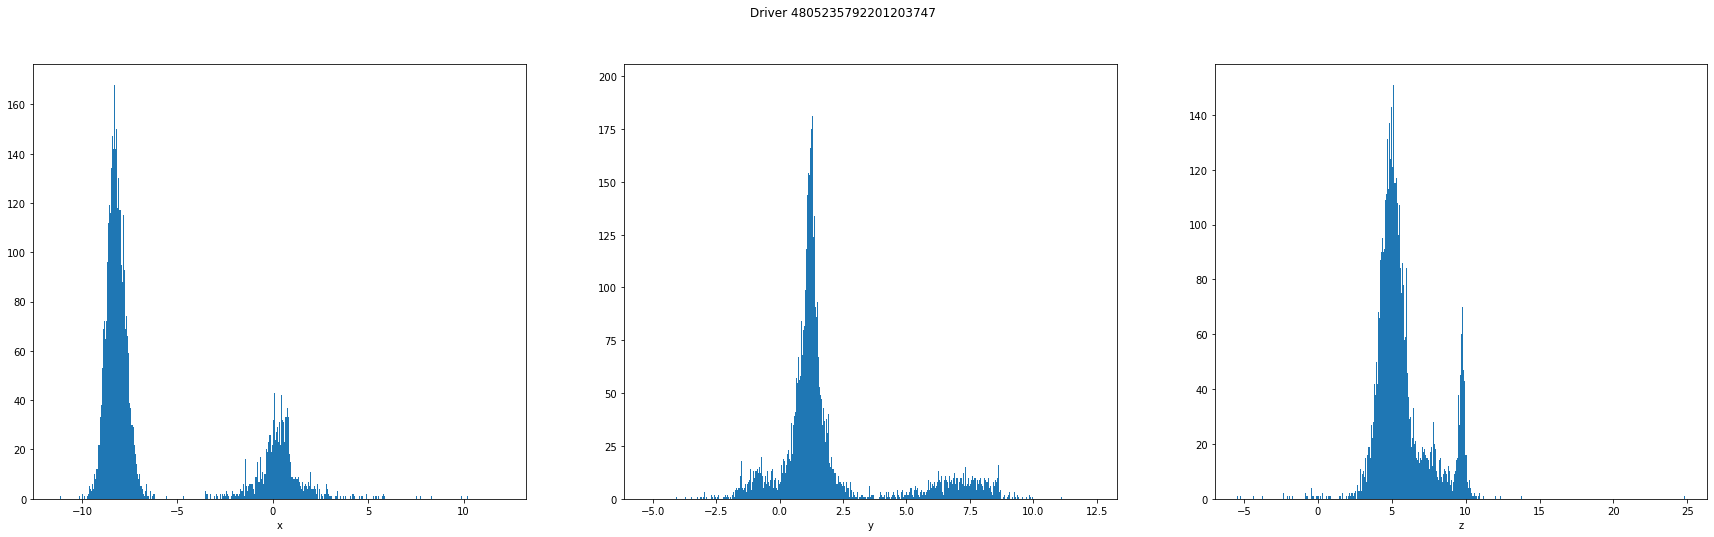

/Users/viconstel/JupyterProjects/city-mobil/data_good_right_dates/4792989220905314639/accelerometer.csv


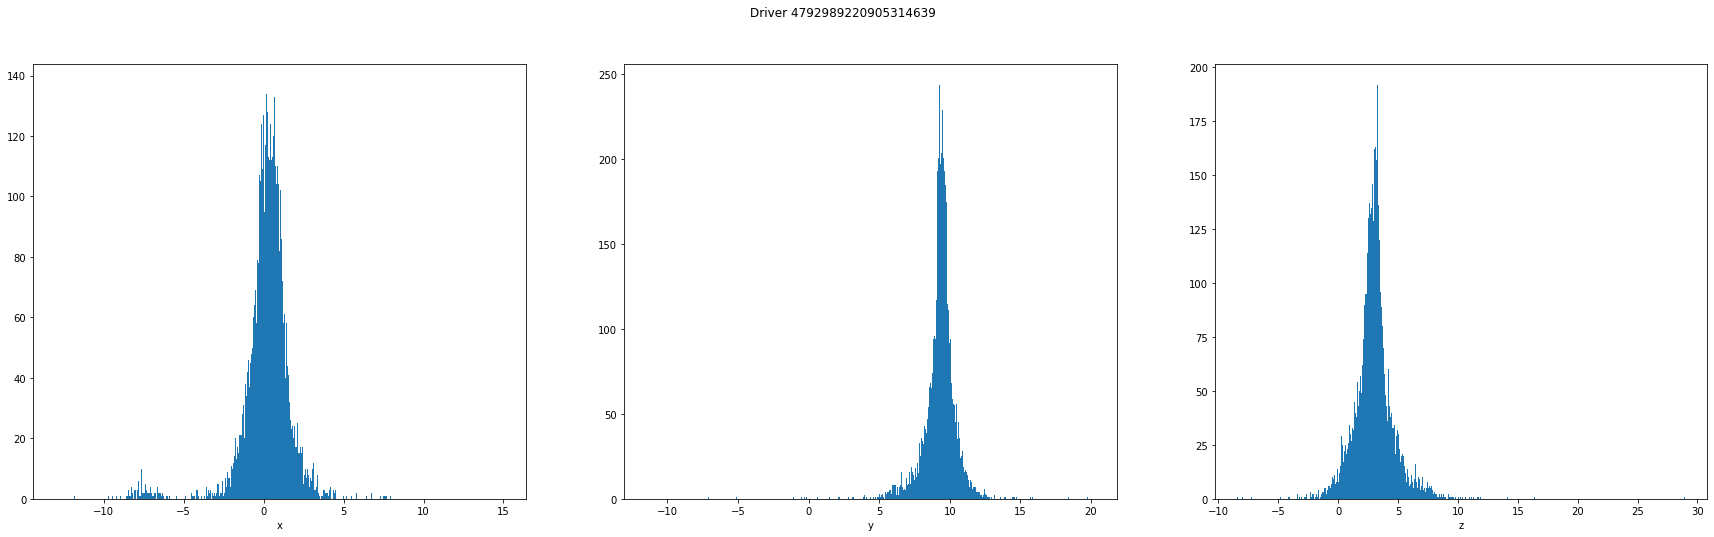

In [40]:
stats = []
directory = os.listdir(GOOD_DIR)
n_bins = 1000

for dir_name in directory:
    if dir_name == '.DS_Store':
        continue
        
    fig, ax = plt.subplots(1, 3, figsize=(30, 8))
    path = os.path.join(GOOD_DIR, dir_name)
    print(os.path.join(path, 'accelerometer.csv'))
    df = pd.read_csv(os.path.join(path, 'accelerometer.csv'))[['x', 'y', 'z']]
    fig.suptitle(f'Driver {dir_name}')
    ax[0].hist(df.x, bins=n_bins)
    ax[0].set_xlabel('x')
    ax[1].hist(df.y, bins=n_bins)
    ax[1].set_xlabel('y')
    ax[2].hist(df.z, bins=n_bins)
    ax[2].set_xlabel('z')
    plt.show()

/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/-3962756297262839169/accelerometer.csv


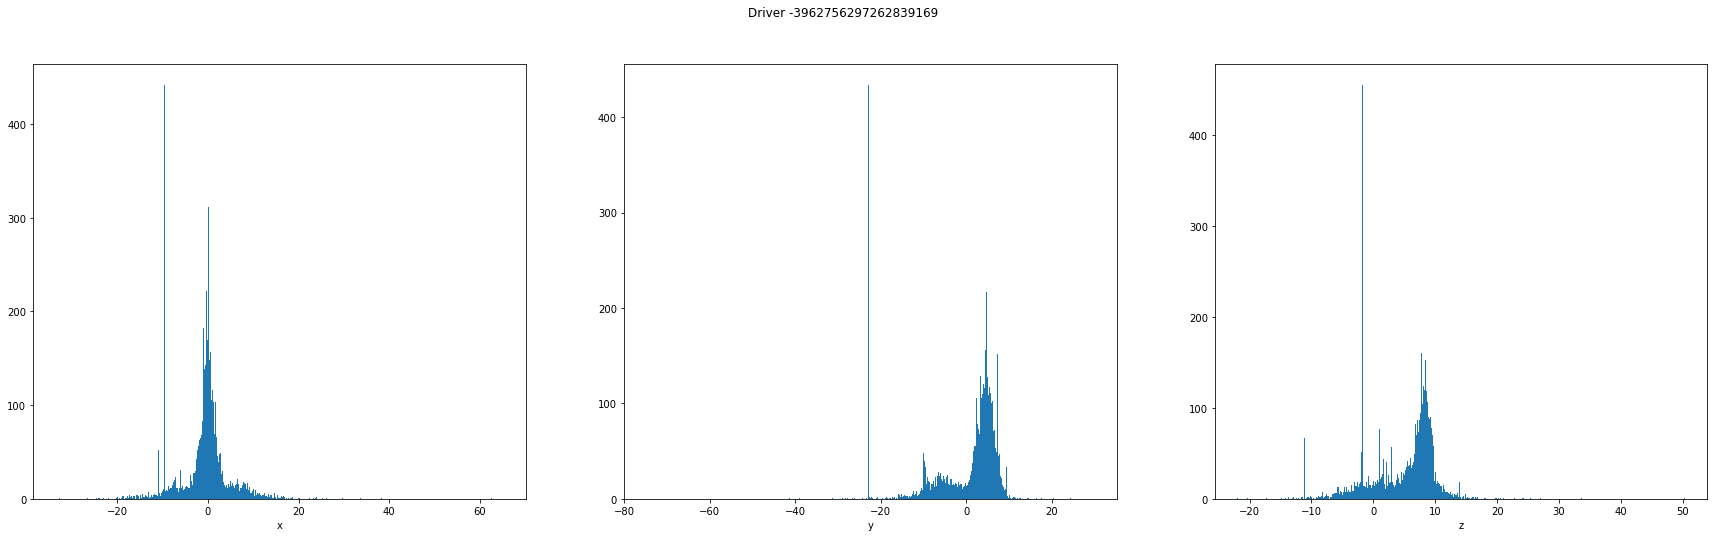

/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/2765355583032989810/accelerometer.csv


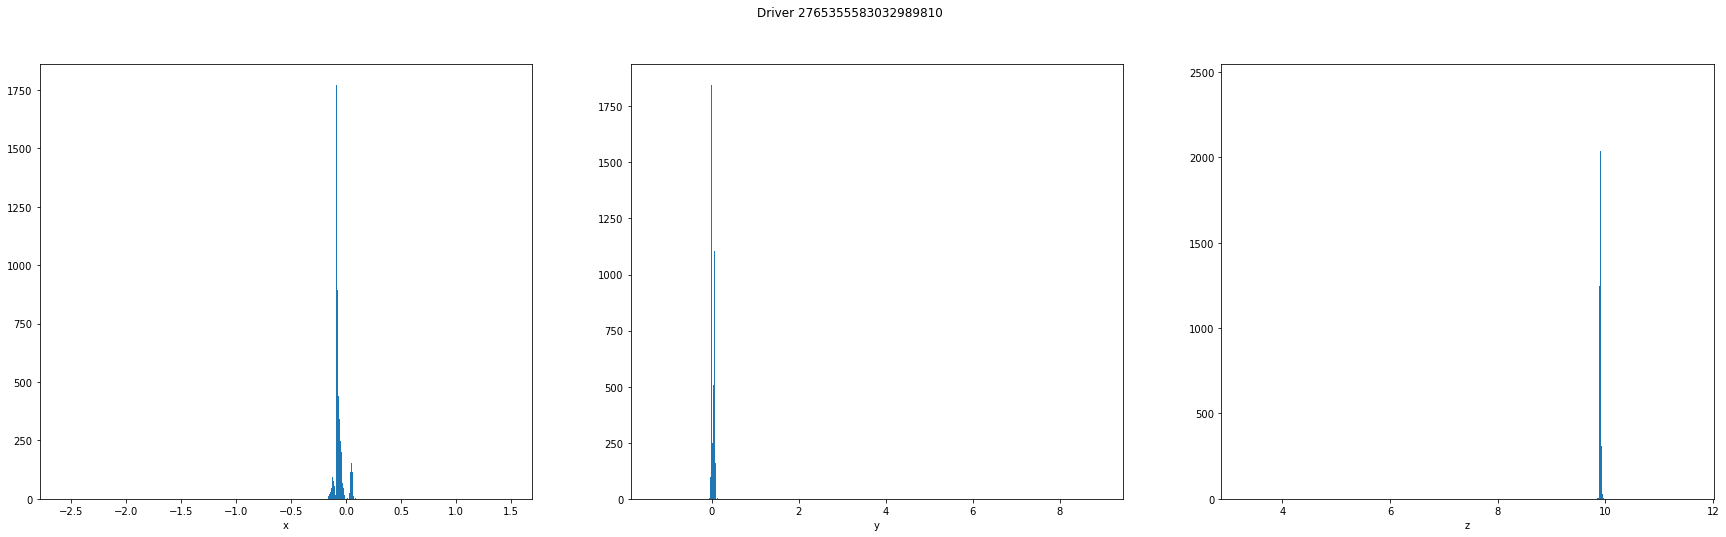

/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/-7078426713190014901/accelerometer.csv


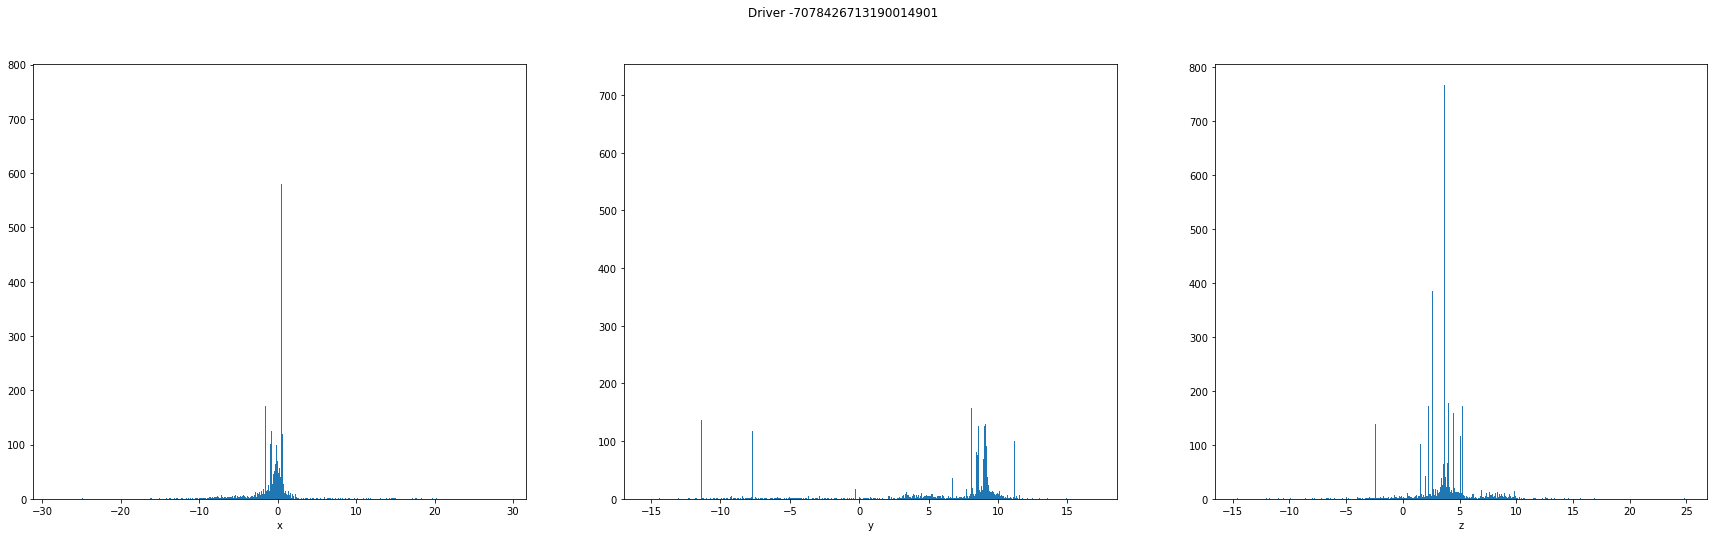

/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/-2988946964244641879/accelerometer.csv


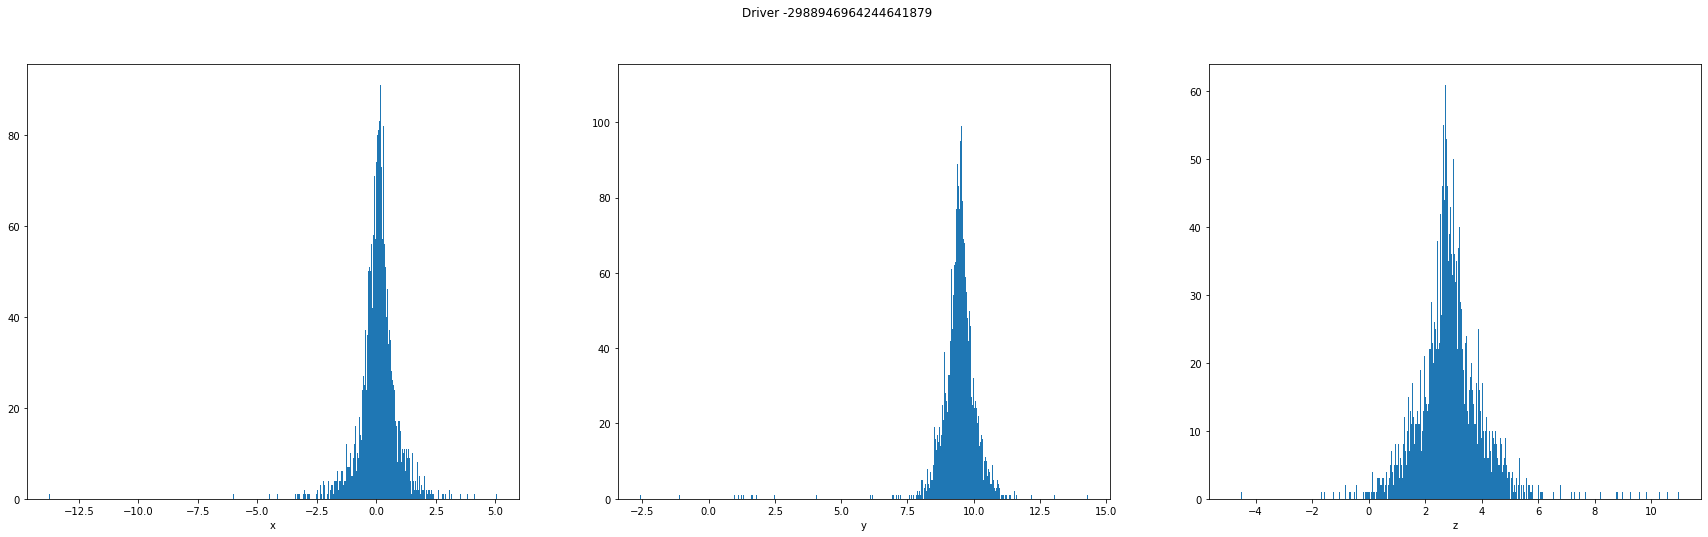

/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/-2132251359044308970/accelerometer.csv


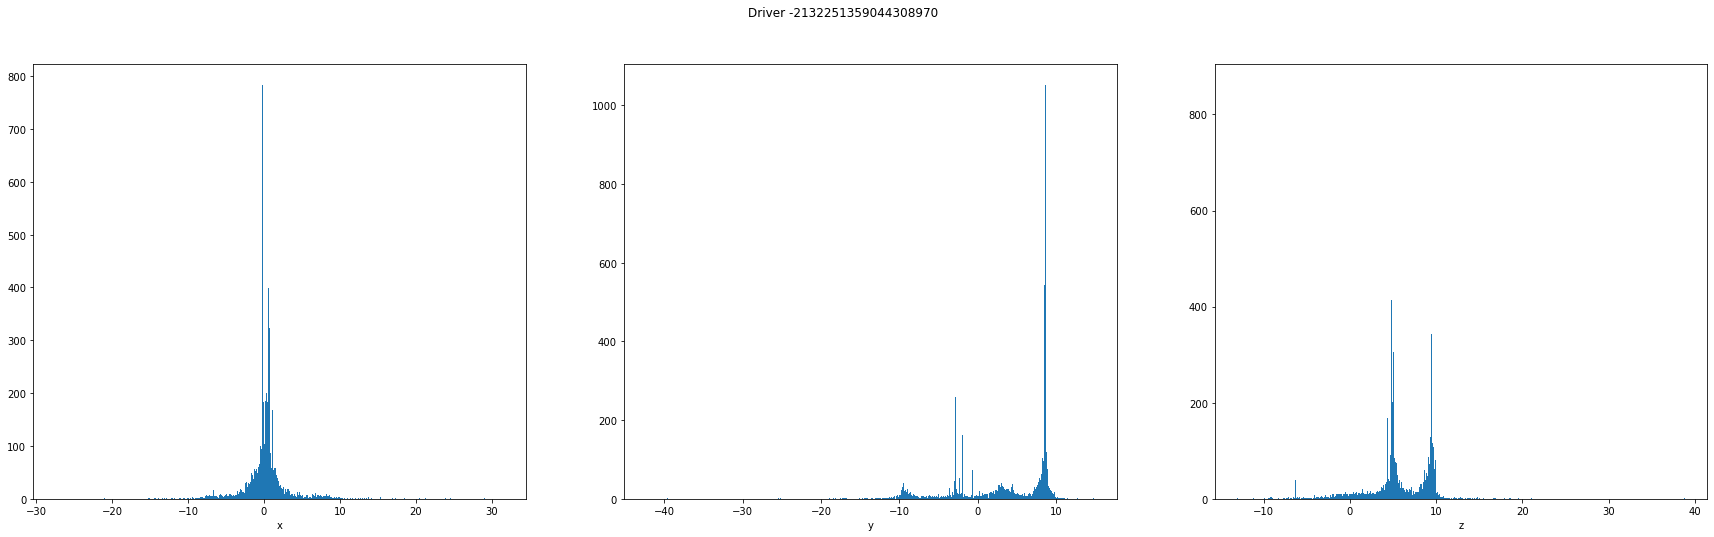

/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/8569741546477592565/accelerometer.csv


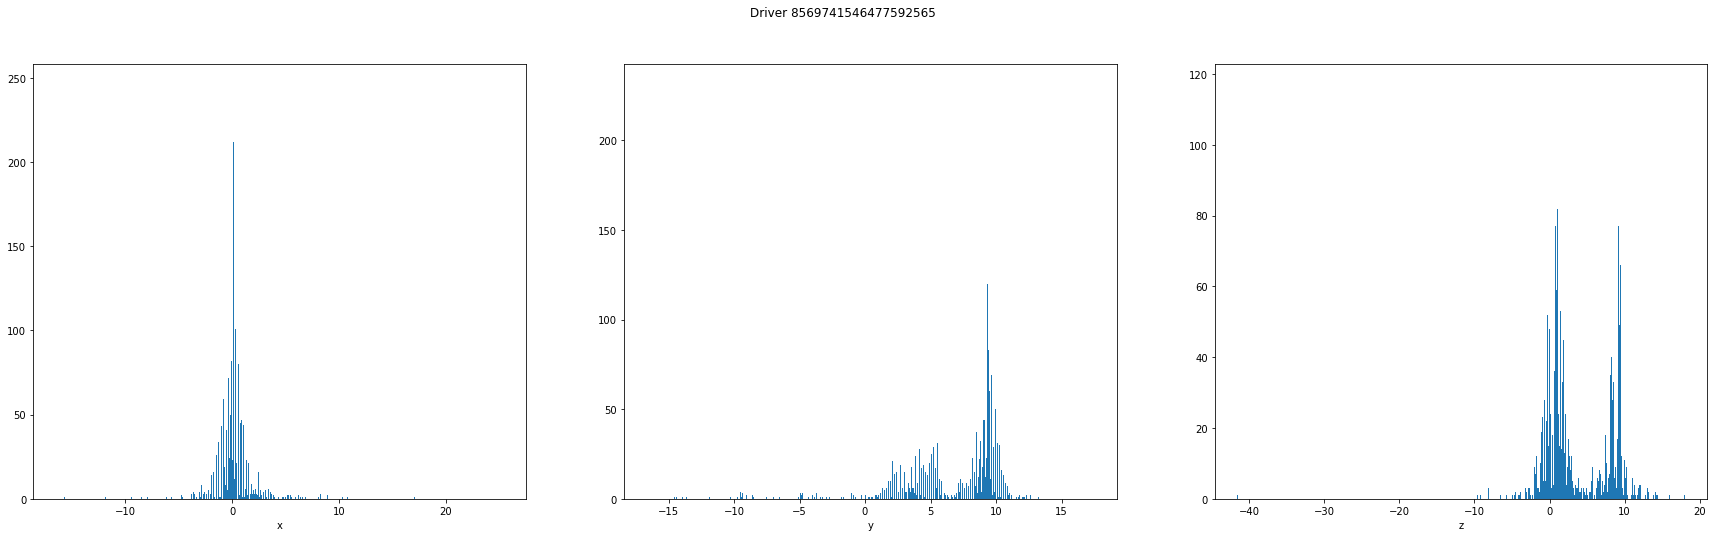

/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/1293535473153840726/accelerometer.csv


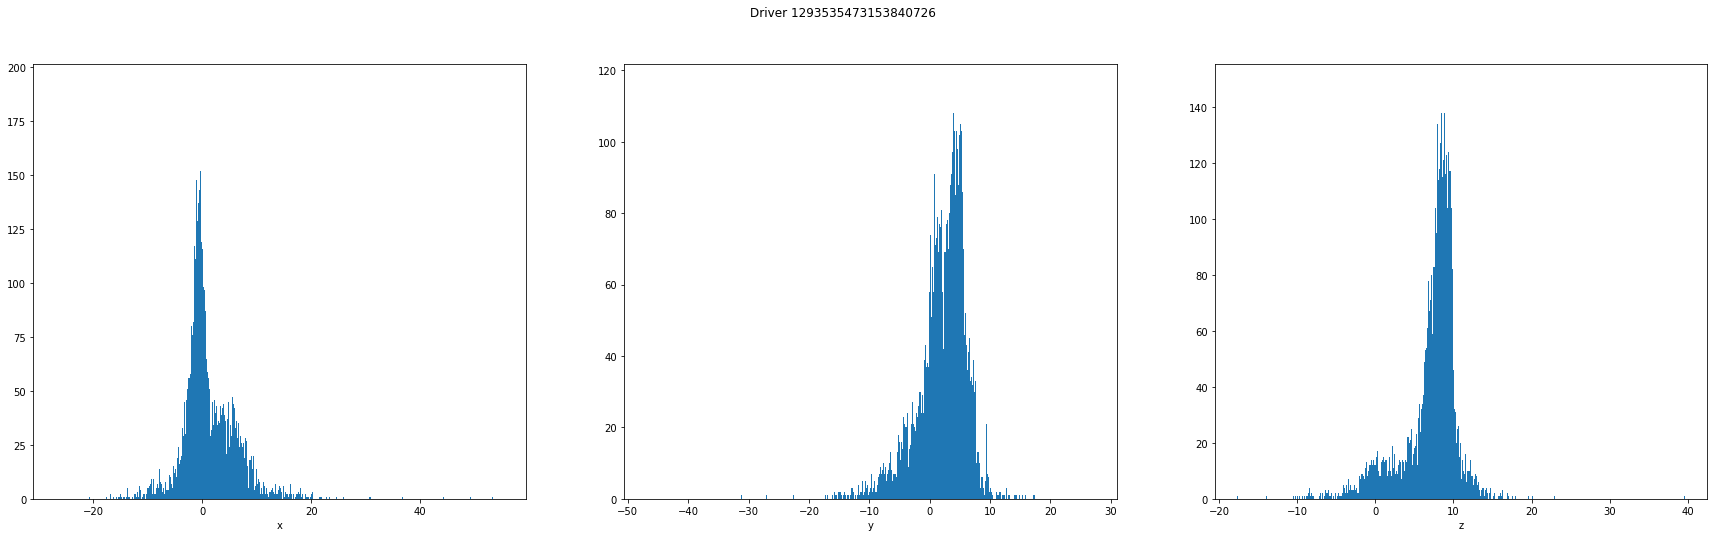

/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/-8729475955540025841/accelerometer.csv


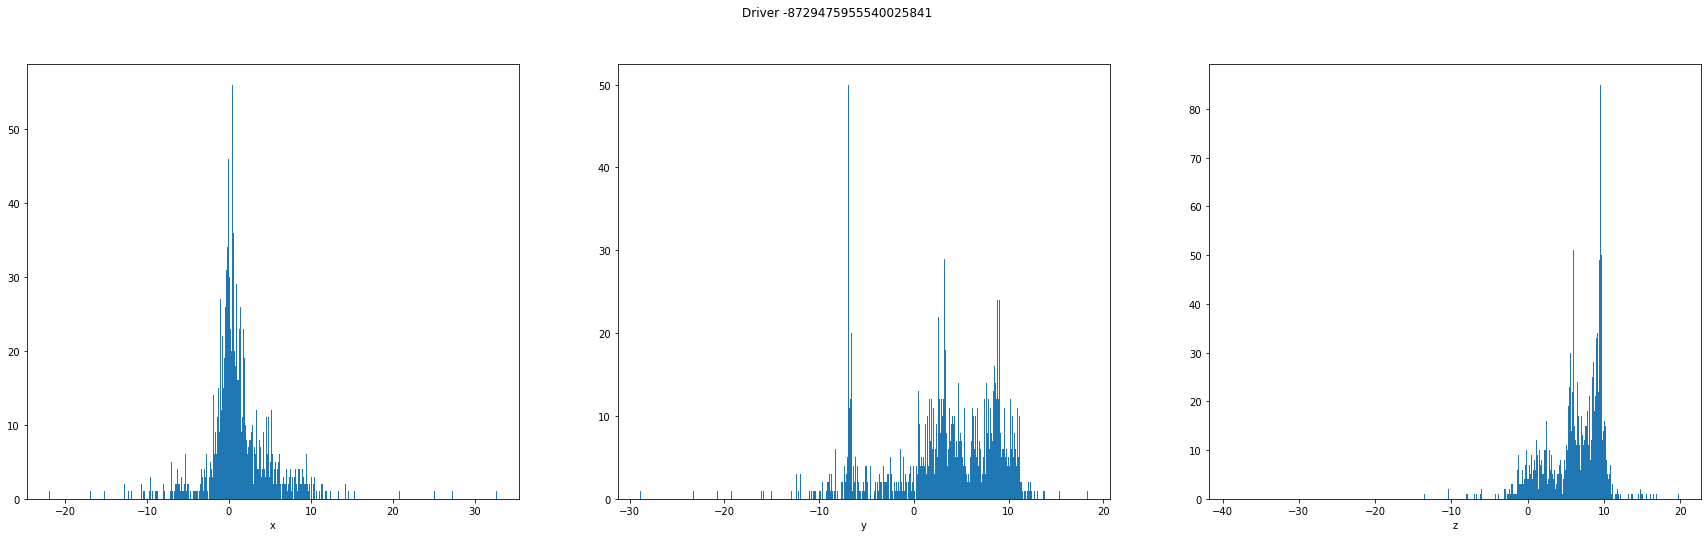

/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/-6715898809375179473/accelerometer.csv


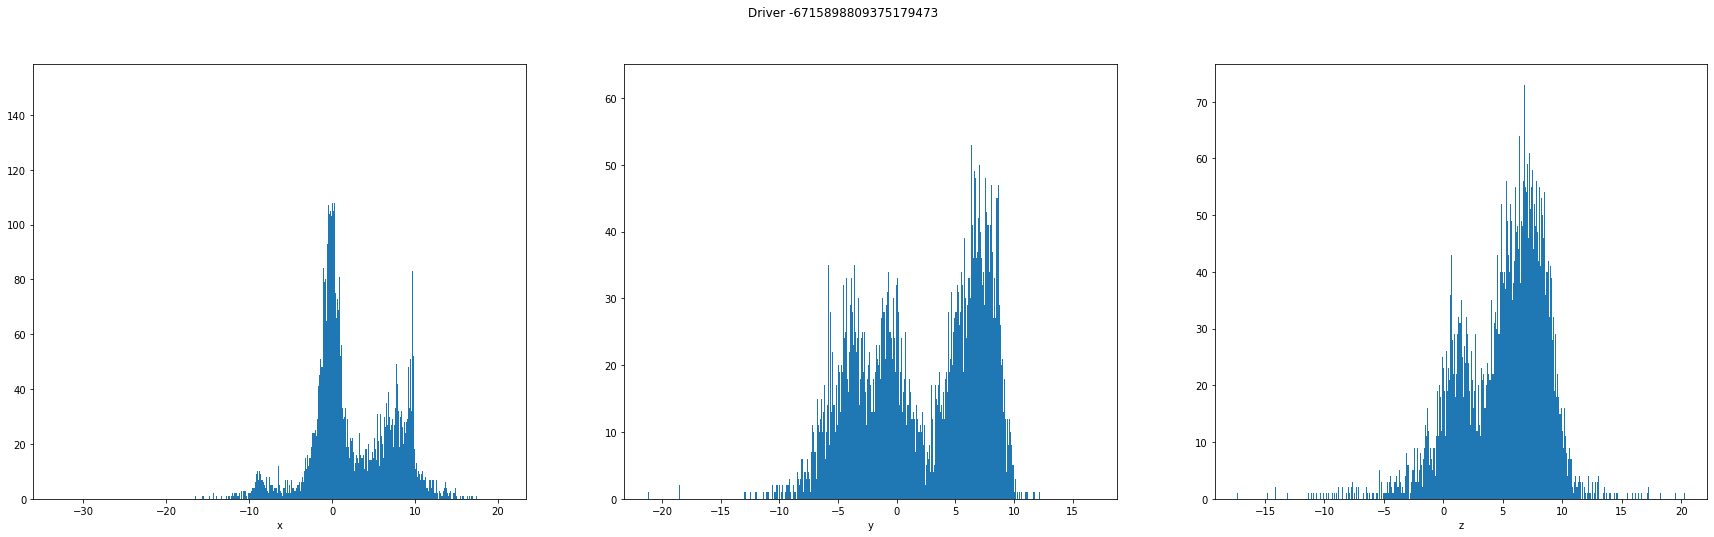

/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/-7745607963253656189/accelerometer.csv


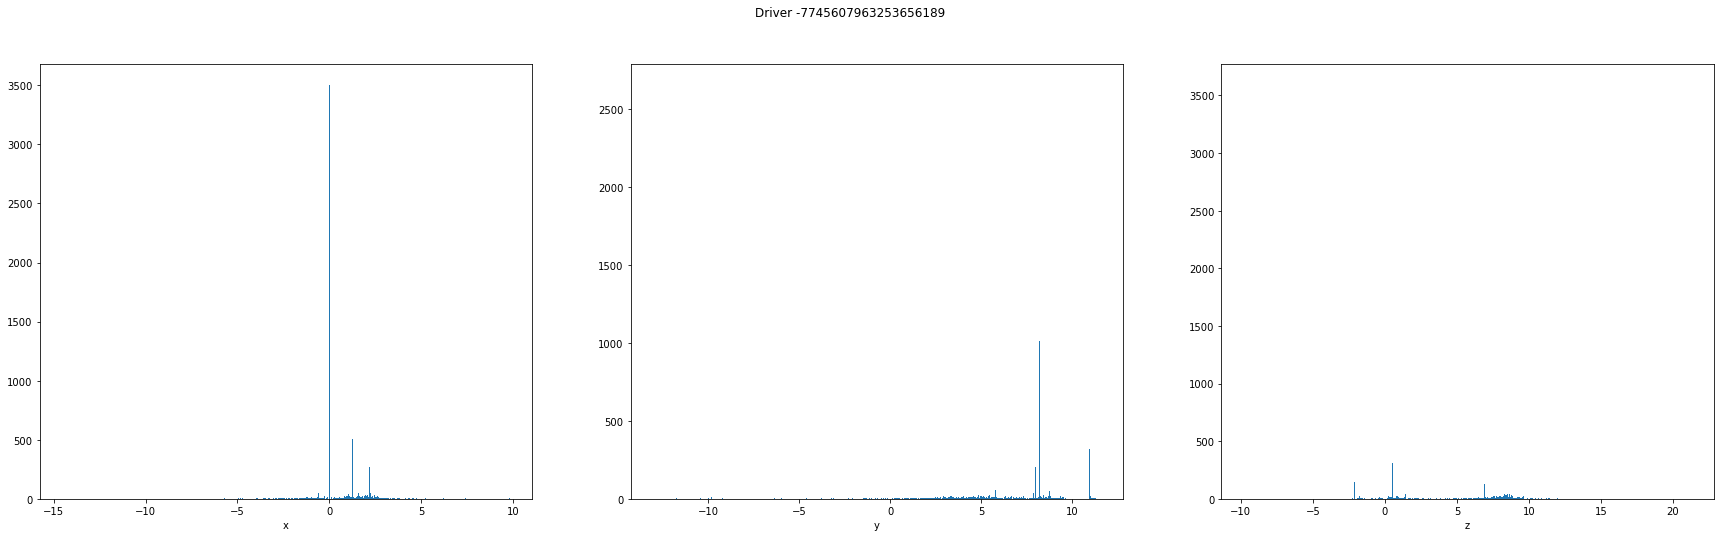

/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/-4385647888228392778/accelerometer.csv


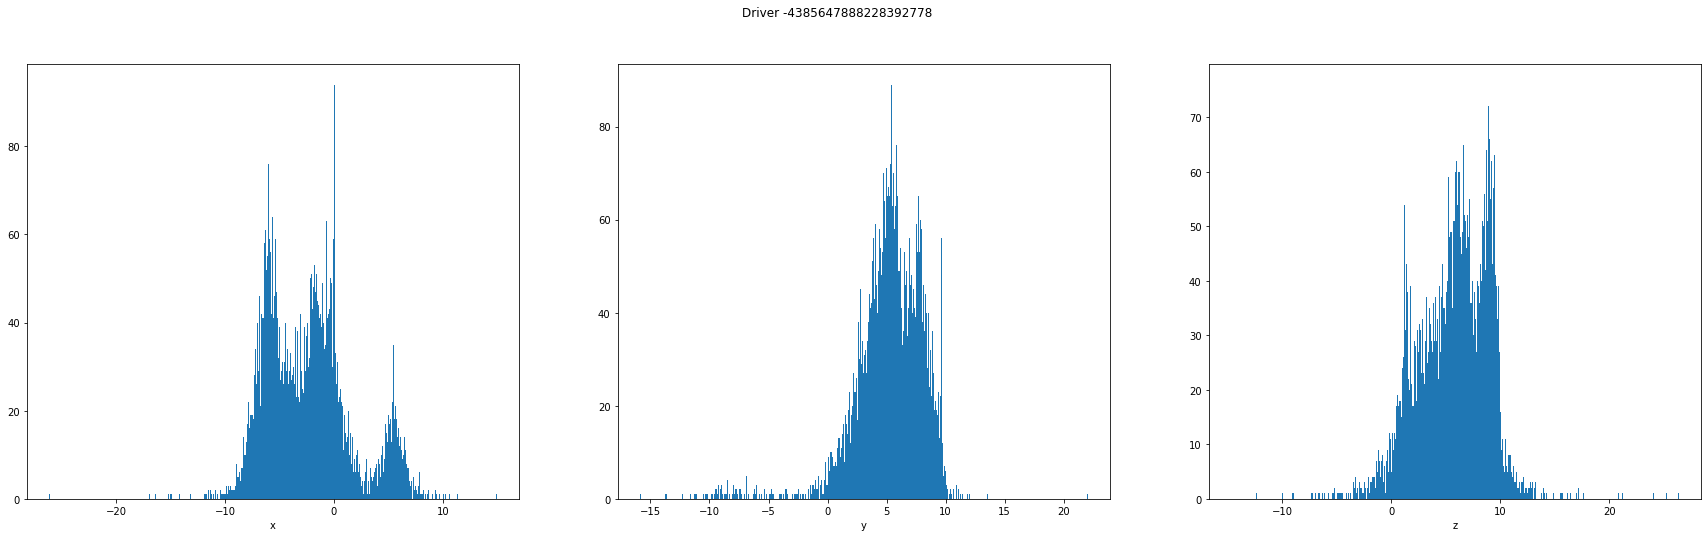

/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/-4687681644253937266/accelerometer.csv


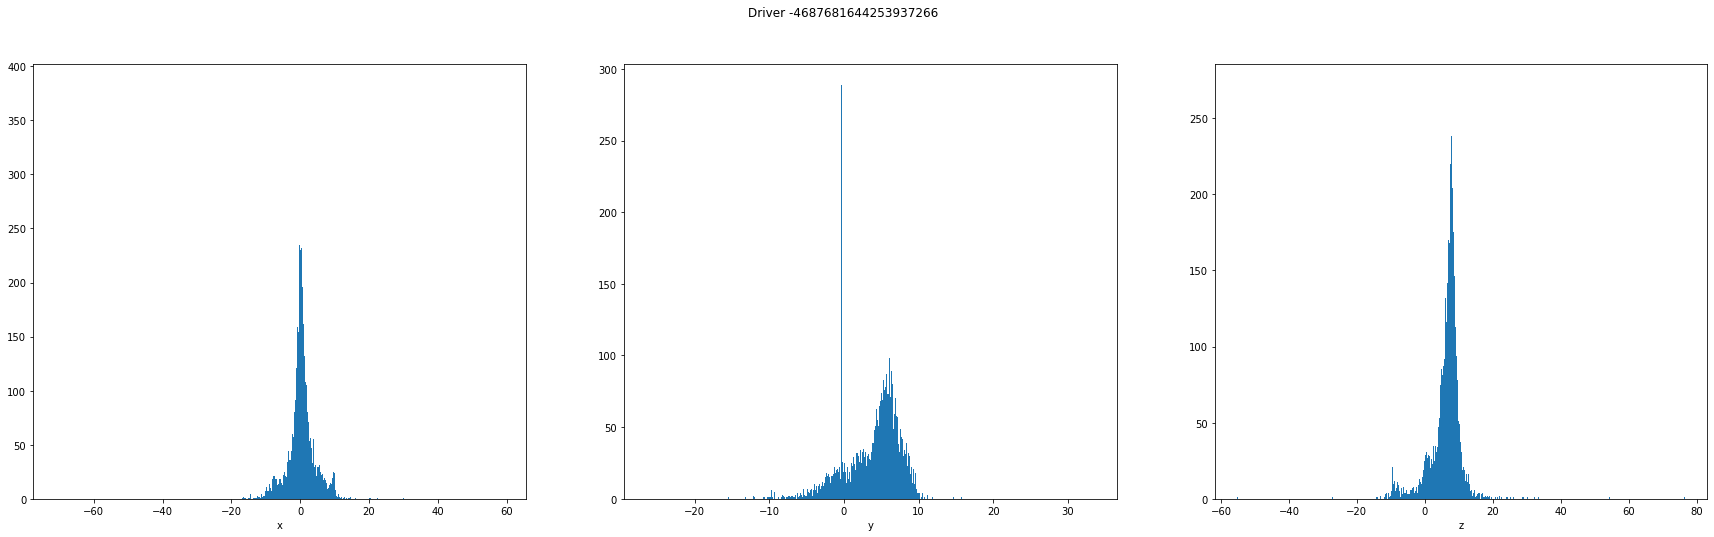

/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/-8915411586673655243/accelerometer.csv


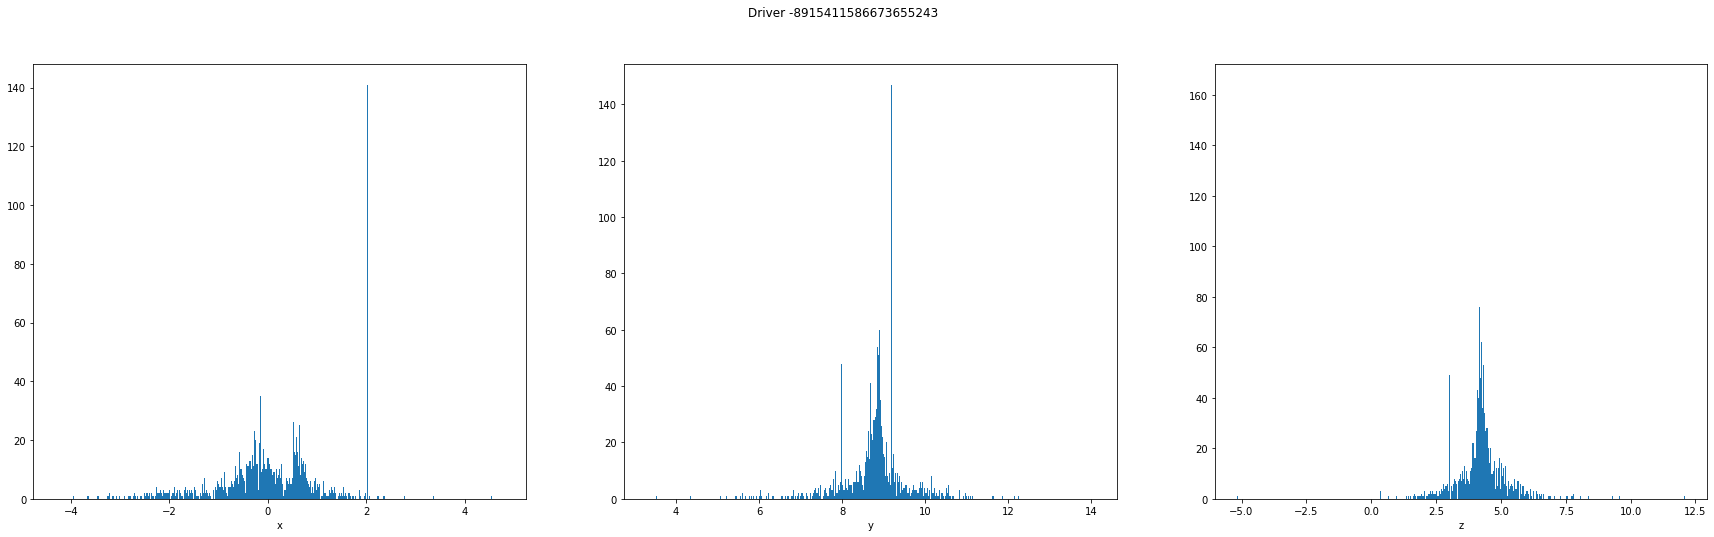

/Users/viconstel/JupyterProjects/city-mobil/drivers_with_gps_and_sl_problems/2025312357143911724/accelerometer.csv


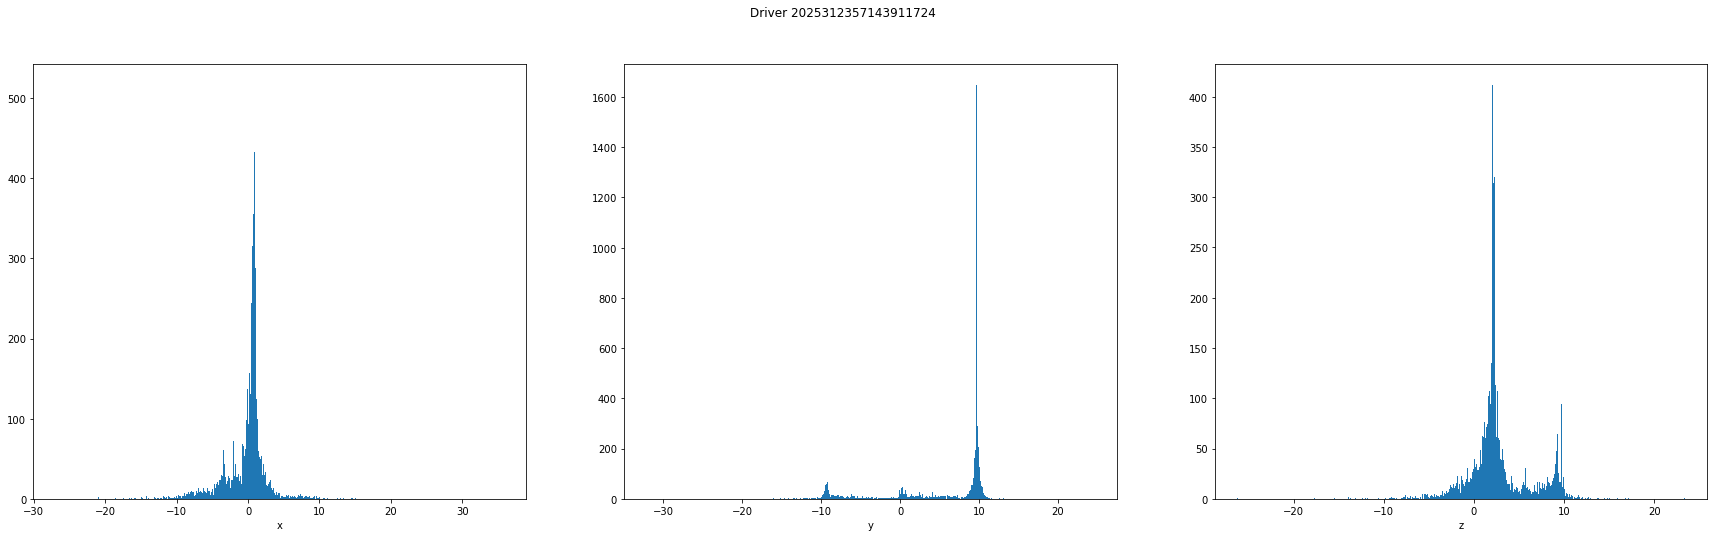

In [41]:
stats = []
directory = os.listdir(BAD_DIR)
n_bins = 1000

for dir_name in directory:
    if dir_name == '.DS_Store':
        continue
        
    fig, ax = plt.subplots(1, 3, figsize=(30, 8))
    path = os.path.join(BAD_DIR, dir_name)
    print(os.path.join(path, 'accelerometer.csv'))
    df = pd.read_csv(os.path.join(path, 'accelerometer.csv'))[['x', 'y', 'z']]
    fig.suptitle(f'Driver {dir_name}')
    ax[0].hist(df.x, bins=n_bins)
    ax[0].set_xlabel('x')
    ax[1].hist(df.y, bins=n_bins)
    ax[1].set_xlabel('y')
    ax[2].hist(df.z, bins=n_bins)
    ax[2].set_xlabel('z')
    plt.show()